# Начало

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = "/content/drive/"

Mounted at /content/drive


In [ ]:
!pip3 install tensorflow==2.2

     |████████████████████████████████| 516.2MB 32kB/s 
     |████████████████████████████████| 460kB 46.5MB/s 
     |████████████████████████████████| 2.9MB 34.2MB/s 
     |████████████████████████████████| 3.0MB 17.6MB/s 
  Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully uninstalled tensorboard-2.5.0
  Found existing installation: tensorflow 2.5.0
    Uninstalling tensorflow-2.5.0:
      Successfully uninstalled tensorflow-2.5.0


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from IPython.display import Image
import scipy.stats as stats
import warnings
warnings.simplefilter("ignore", UserWarning)
%matplotlib inline 
sns.set(style="ticks")

In [ ]:
data = pd.read_csv(path+'/MyDrive/student-mat.csv')
data.head()

school sex  age address famsize Pstatus  ...  Walc  health absences  G1  G2  G3
0     GP   F   18       U     GT3       A  ...     1       3        6   5   6   6
1     GP   F   17       U     GT3       T  ...     1       3        4   5   5   6
2     GP   F   15       U     LE3       T  ...     3       3       10   7   8  10
3     GP   F   15       U     GT3       T  ...     1       5        2  15  14  15
4     GP   F   16       U     GT3       T  ...     2       5        4   6  10  10

[5 rows x 33 columns]

In [ ]:
data.shape

(395, 33)

# Пропуски в данных

In [ ]:
data_features = list(zip(
# признаки
[i for i in data.columns],
zip(
    # типы колонок
    [str(i) for i in data.dtypes],
    # проверим есть ли пропущенные значения
    [i for i in data.isnull().sum()],
    [i for i in data.nunique()]
)))
# Признаки с типом данных и количеством пропусков
data_features

[('school', ('object', 0, 2)),
 ('sex', ('object', 0, 2)),
 ('age', ('int64', 0, 8)),
 ('address', ('object', 0, 2)),
 ('famsize', ('object', 0, 2)),
 ('Pstatus', ('object', 0, 2)),
 ('Medu', ('int64', 0, 5)),
 ('Fedu', ('int64', 0, 5)),
 ('Mjob', ('object', 0, 5)),
 ('Fjob', ('object', 0, 5)),
 ('reason', ('object', 0, 4)),
 ('guardian', ('object', 0, 3)),
 ('traveltime', ('int64', 0, 4)),
 ('studytime', ('int64', 0, 4)),
 ('failures', ('int64', 0, 4)),
 ('schoolsup', ('object', 0, 2)),
 ('famsup', ('object', 0, 2)),
 ('paid', ('object', 0, 2)),
 ('activities', ('object', 0, 2)),
 ('nursery', ('object', 0, 2)),
 ('higher', ('object', 0, 2)),
 ('internet', ('object', 0, 2)),
 ('romantic', ('object', 0, 2)),
 ('famrel', ('int64', 0, 5)),
 ('freetime', ('int64', 0, 5)),
 ('goout', ('int64', 0, 5)),
 ('Dalc', ('int64', 0, 5)),
 ('Walc', ('int64', 0, 5)),
 ('health', ('int64', 0, 5)),
 ('absences', ('int64', 0, 34)),
 ('G1', ('int64', 0, 17)),
 ('G2', ('int64', 0, 17)),
 ('G3', ('int64', 0

Пропусков в данных не обнаружено. 

# Кодирование категориальных признаков

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
data_encoded = data.copy()

In [ ]:
columns = ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']
for column in columns:
    label_encoder = LabelEncoder()
    data_encoded[column] = label_encoder.fit_transform(data_encoded[column])

In [ ]:
data_encoded.head()

school  sex  age  address  famsize  ...  health  absences  G1  G2  G3
0       0    0   18        1        0  ...       3         6   5   6   6
1       0    0   17        1        0  ...       3         4   5   5   6
2       0    0   15        1        1  ...       3        10   7   8  10
3       0    0   15        1        0  ...       5         2  15  14  15
4       0    0   16        1        0  ...       5         4   6  10  10

[5 rows x 33 columns]

# Нормализация числовых признаков

In [ ]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(10,5))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

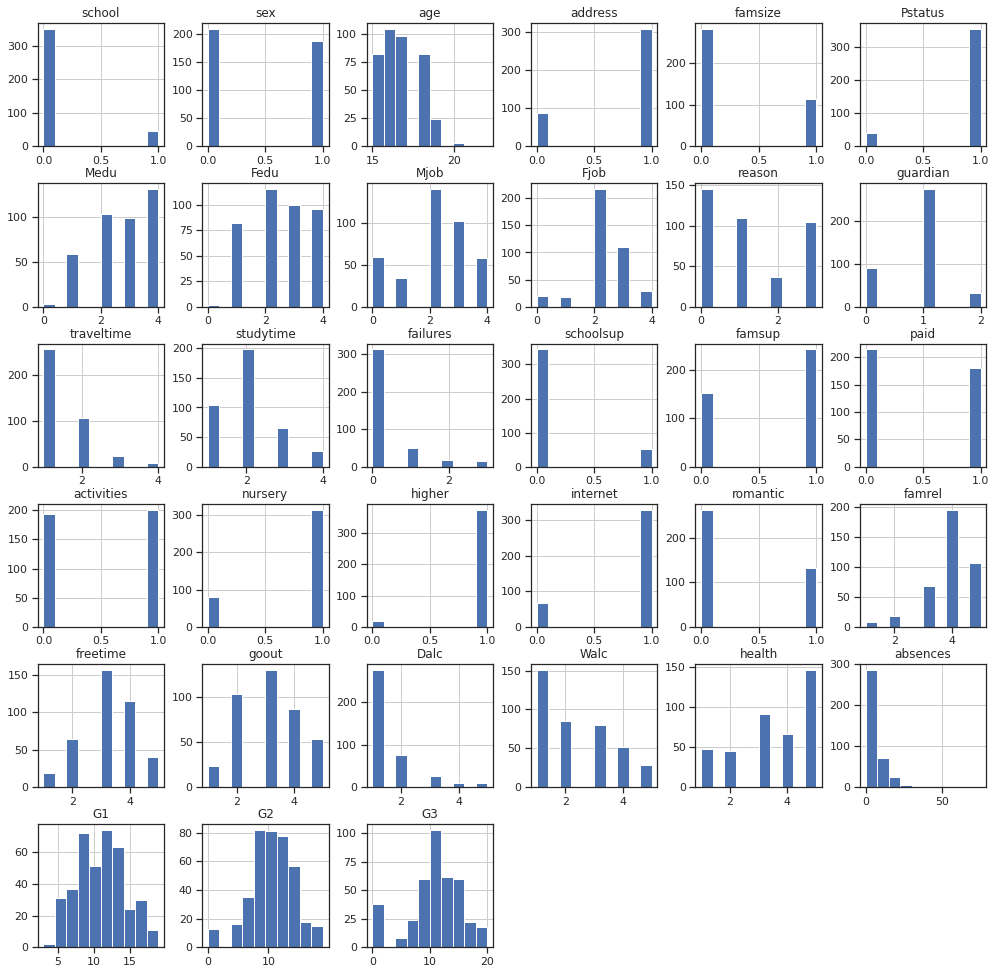

In [ ]:
data2 = data_encoded.copy()
data2.hist(figsize=(17,17))
plt.show()

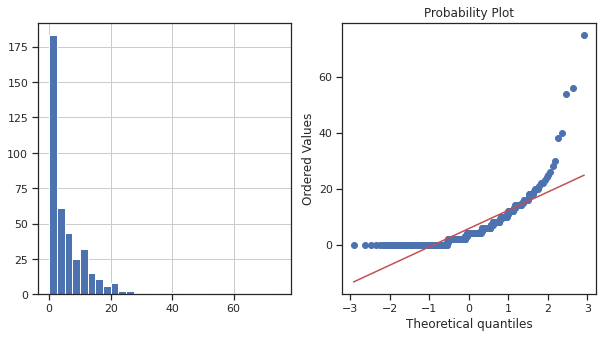

In [ ]:
diagnostic_plots(data2, 'absences')

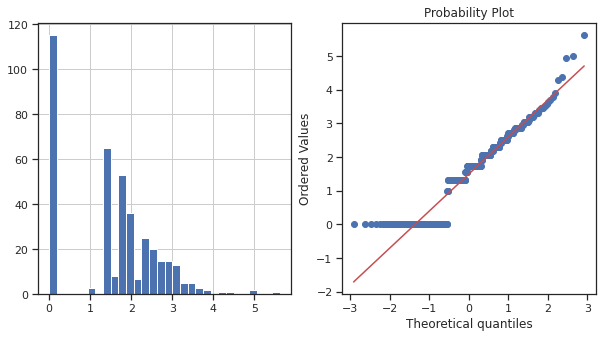

In [ ]:
data2['absences_exp1'] = data2['absences']**(0.4)
diagnostic_plots(data2, 'absences_exp1')

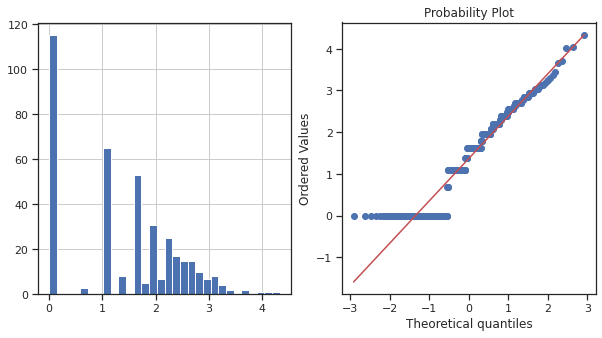

In [ ]:
data2['absences_log'] = np.log(data2['absences']+1)
diagnostic_plots(data2, 'absences_log')

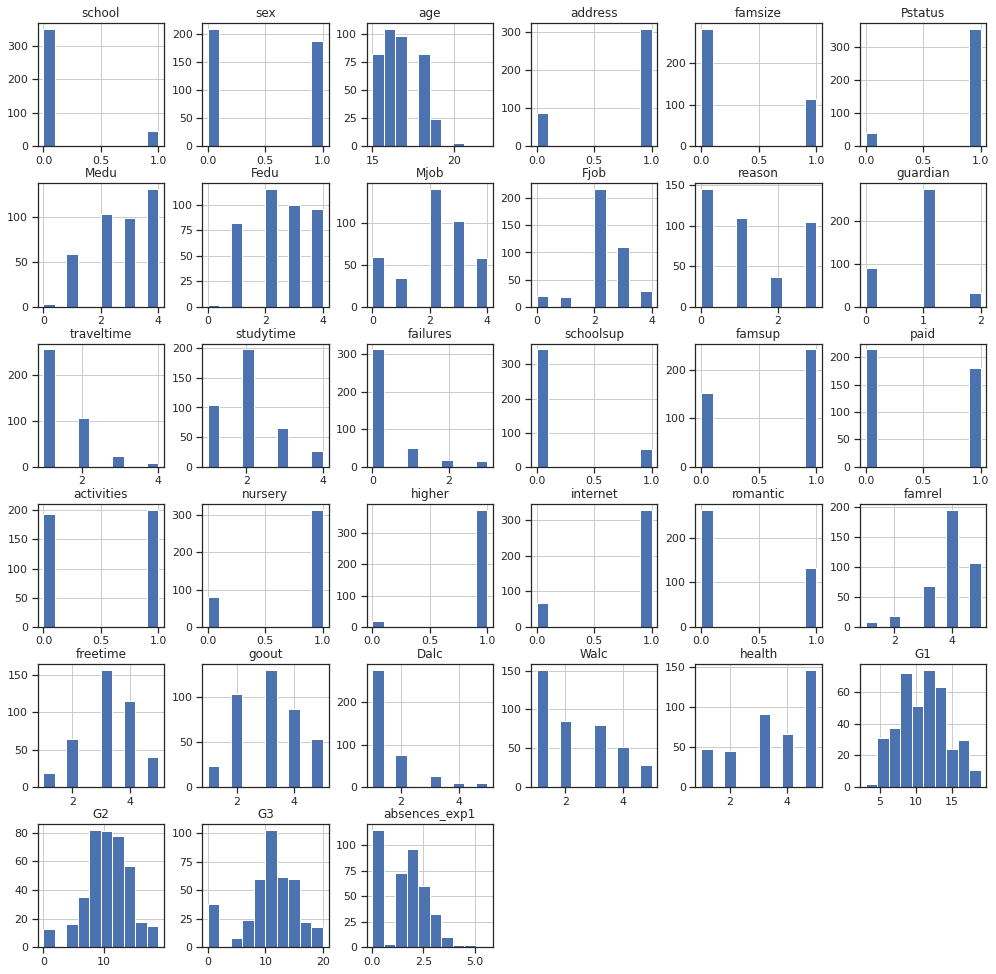

In [ ]:
data2 = data2.drop(columns=['absences'])
data2.hist(figsize=(17,17))
plt.show()

Пропустим пока нормализацию

# Масштабирование признаков

In [ ]:
filtered_columns = ['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences_exp1','G1','G2','G3']
data3 = data2[filtered_columns]
# Нужно ли масштабирование
data3.describe()

age        Medu        Fedu  ...          G1          G2          G3
count  395.000000  395.000000  395.000000  ...  395.000000  395.000000  395.000000
mean    16.696203    2.749367    2.521519  ...   10.908861   10.713924   10.415190
std      1.276043    1.094735    1.088201  ...    3.319195    3.761505    4.581443
min     15.000000    0.000000    0.000000  ...    3.000000    0.000000    0.000000
25%     16.000000    2.000000    2.000000  ...    8.000000    9.000000    8.000000
50%     17.000000    3.000000    2.000000  ...   11.000000   11.000000   11.000000
75%     18.000000    4.000000    3.000000  ...   13.000000   13.000000   14.000000
max     22.000000    4.000000    4.000000  ...   19.000000   19.000000   20.000000

[8 rows x 16 columns]

In [ ]:
# DataFrame не содержащий целевой признак
X_ALL = data3.drop('G3', axis=1)

In [ ]:
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

In [ ]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data3['G3'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((316, 15), (79, 15))

In [ ]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs11_scaled =  arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled

age      Medu      Fedu  ...  absences_exp1        G1        G2
0    1.023046  1.143856  1.360371  ...       0.482502 -1.782467 -1.254791
1    0.238380 -1.600009 -1.399970  ...       0.214454 -1.782467 -1.520979
2   -1.330954 -1.600009 -1.399970  ...       0.888383 -1.179147 -0.722415
3   -1.330954  1.143856 -0.479857  ...      -0.154163  1.234133  0.874715
4   -0.546287  0.229234  0.440257  ...       0.214454 -1.480807 -0.190038
..        ...       ...       ...  ...            ...       ...       ...
390  2.592380 -0.685387 -0.479857  ...       0.973729 -0.575827 -0.456226
391  0.238380  0.229234 -1.399970  ...       0.048980  0.932473  1.407091
392  3.377047 -1.600009 -1.399970  ...       0.048980 -0.274167 -0.722415
393  1.023046  0.229234 -0.479857  ...      -1.307862  0.027493  0.342338
394  1.807713 -1.600009 -1.399970  ...       0.356580 -0.877487 -0.456226

[395 rows x 15 columns]

In [ ]:
data_cs11_scaled.describe()

age          Medu  ...            G1            G2
count  3.950000e+02  3.950000e+02  ...  3.950000e+02  3.950000e+02
mean   1.411529e-15  8.432074e-18  ... -5.424634e-17 -1.262000e-16
std    1.001268e+00  1.001268e+00  ...  1.001268e+00  1.001268e+00
min   -1.330954e+00 -2.514630e+00  ... -2.385787e+00 -2.851920e+00
25%   -5.462869e-01 -6.853872e-01  ... -8.774869e-01 -4.562264e-01
50%    2.383798e-01  2.292342e-01  ...  2.749306e-02  7.615005e-02
75%    1.023046e+00  1.143856e+00  ...  6.308130e-01  6.085265e-01
max    4.161713e+00  1.143856e+00  ...  2.440773e+00  2.205656e+00

[8 rows x 15 columns]

In [ ]:
# Построение плотности распределения
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

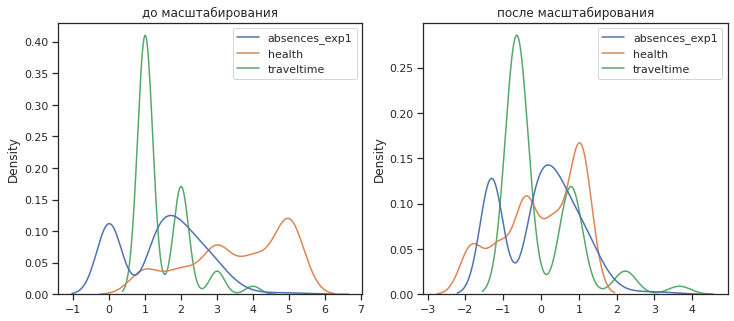

In [ ]:
draw_kde(['absences_exp1', 'health', 'traveltime'], data3, data_cs11_scaled, 'до масштабирования', 'после масштабирования')

# Работа с выбросами

In [ ]:
data4 = data_cs11_scaled

In [ ]:
x_col_list = ['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences_exp1','G1','G2']

In [ ]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(15,10))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

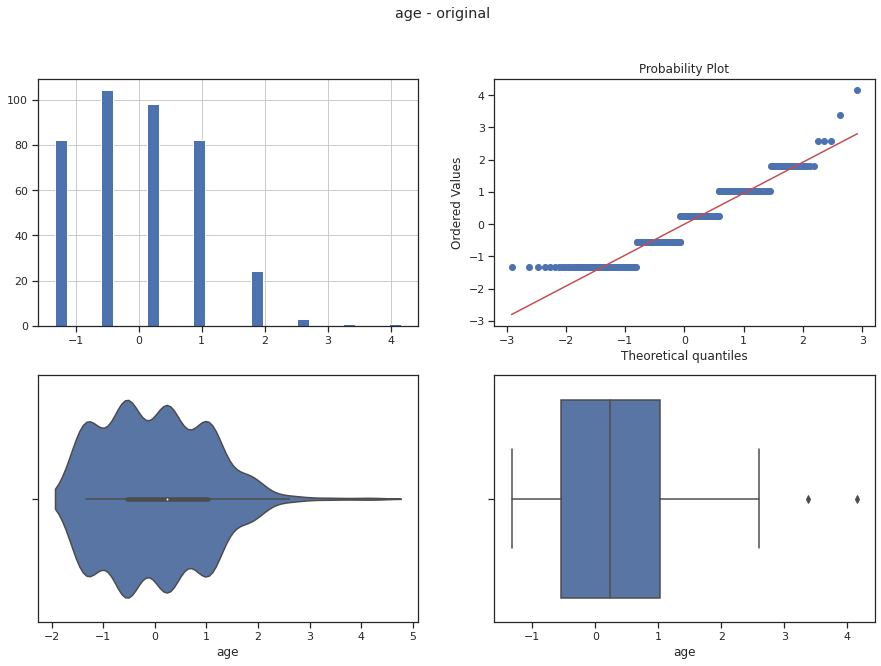

In [ ]:
diagnostic_plots(data4, 'age', 'age - original')

In [ ]:
# Тип вычисления верхней и нижней границы выбросов
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3

In [ ]:
# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
        lower_boundary = df[col].quantile(0.05)
        upper_boundary = df[col].quantile(0.95)

    elif outlier_boundary_type == OutlierBoundaryType.IRQ:
        K2 = 1.5
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
        upper_boundary = df[col].quantile(0.75) + (K2 * IQR)

    else:
        raise NameError('Unknown Outlier Boundary Type')
        
    return lower_boundary, upper_boundary 

In [ ]:
data4.shape

(395, 15)

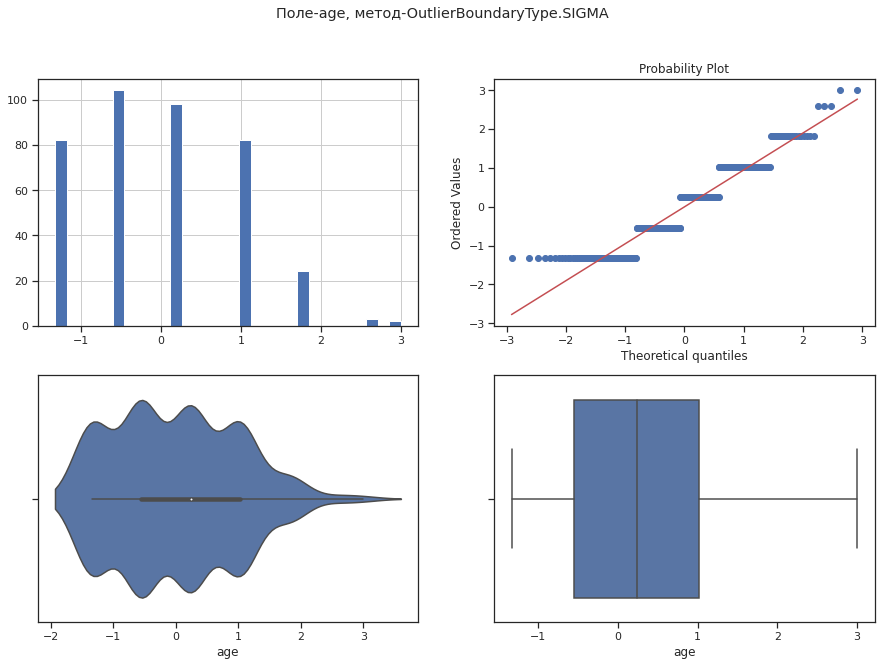

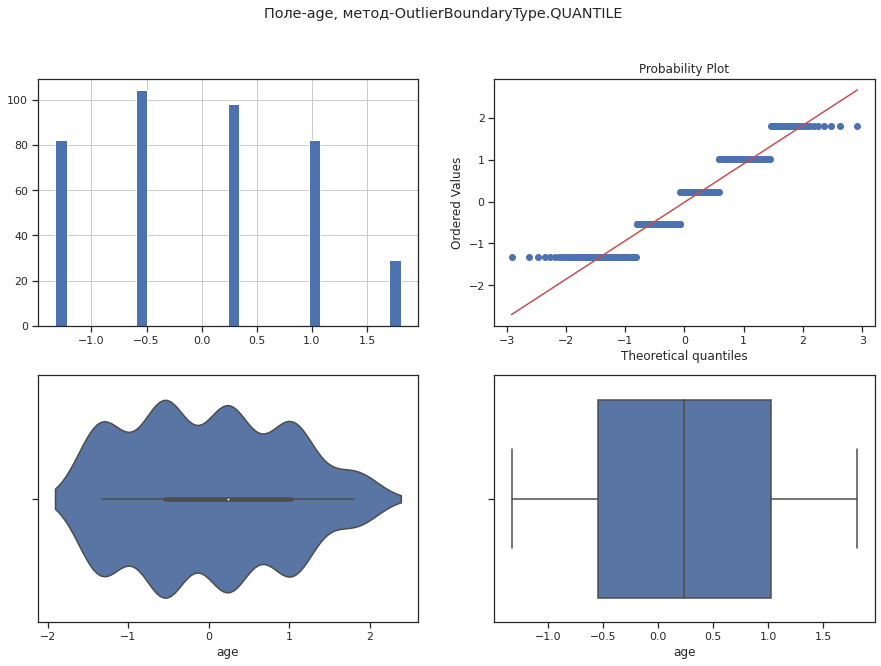

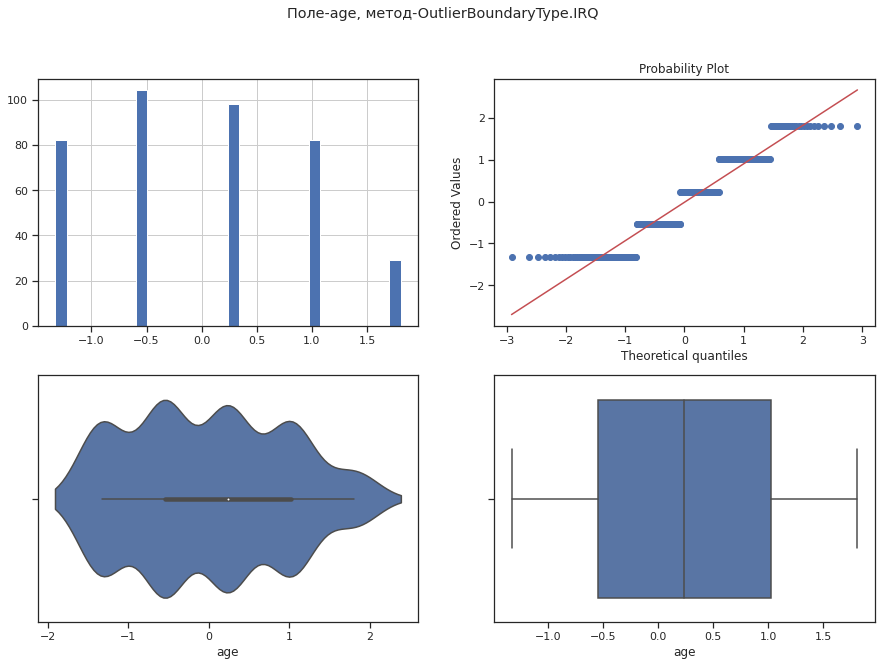

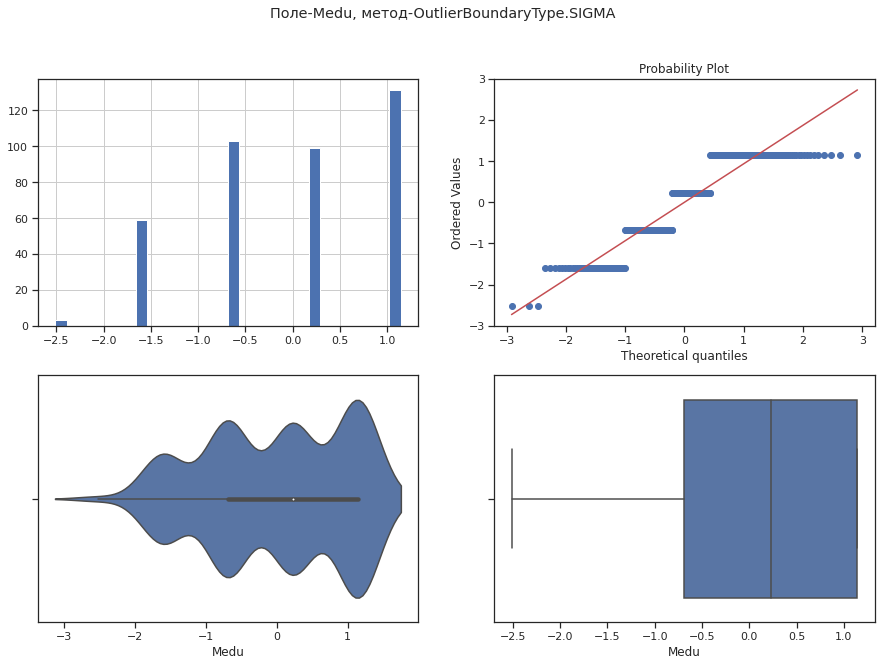

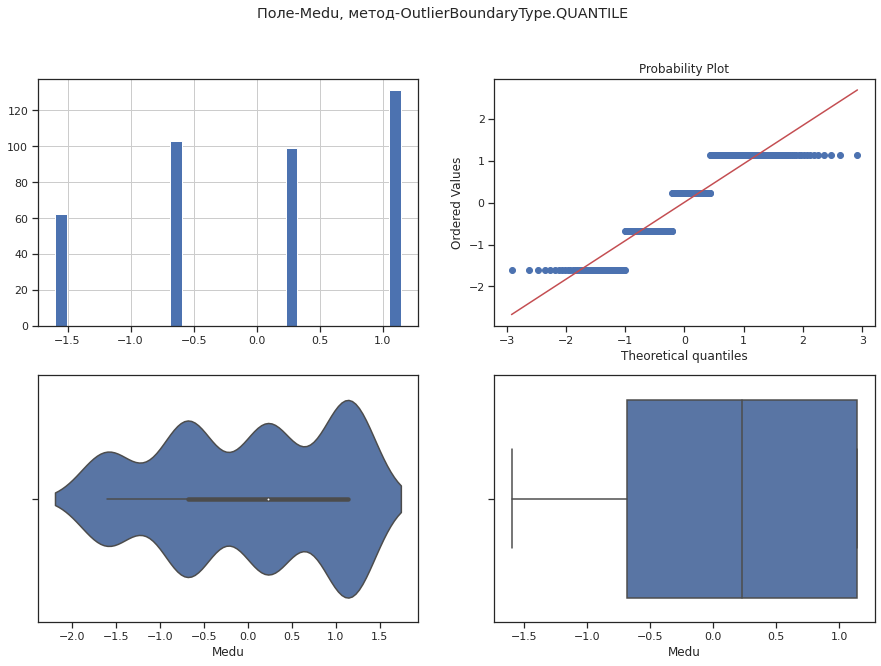

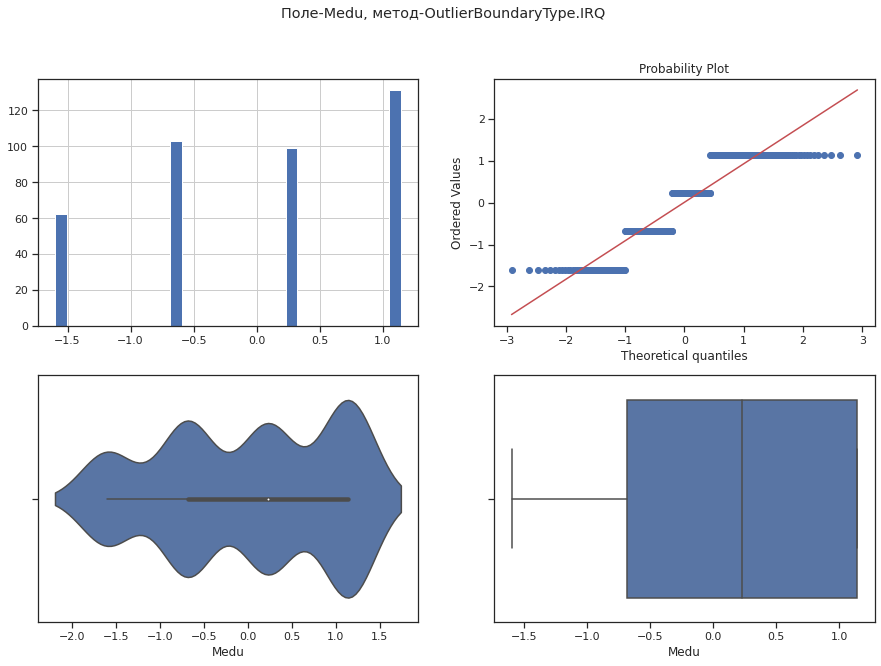

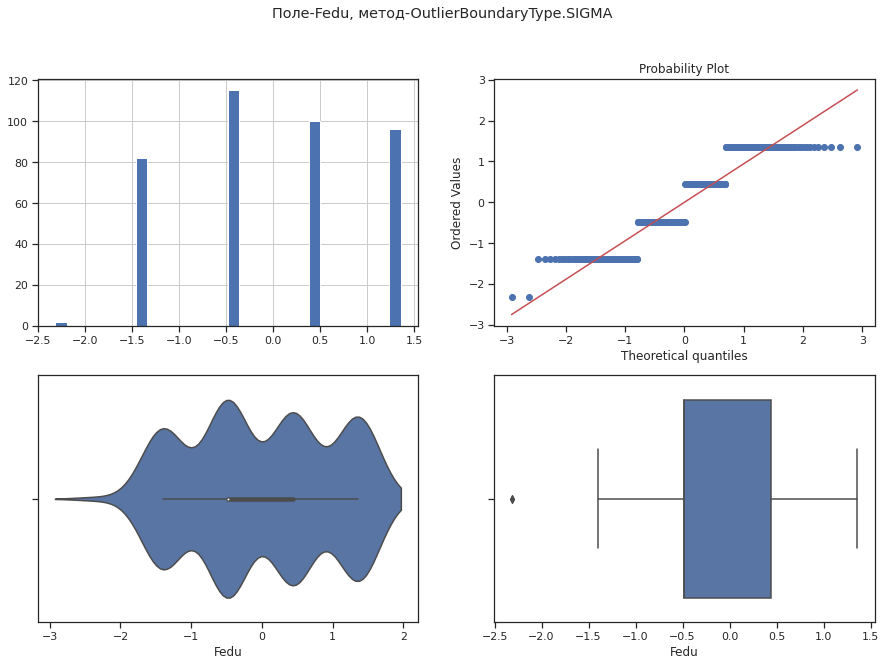

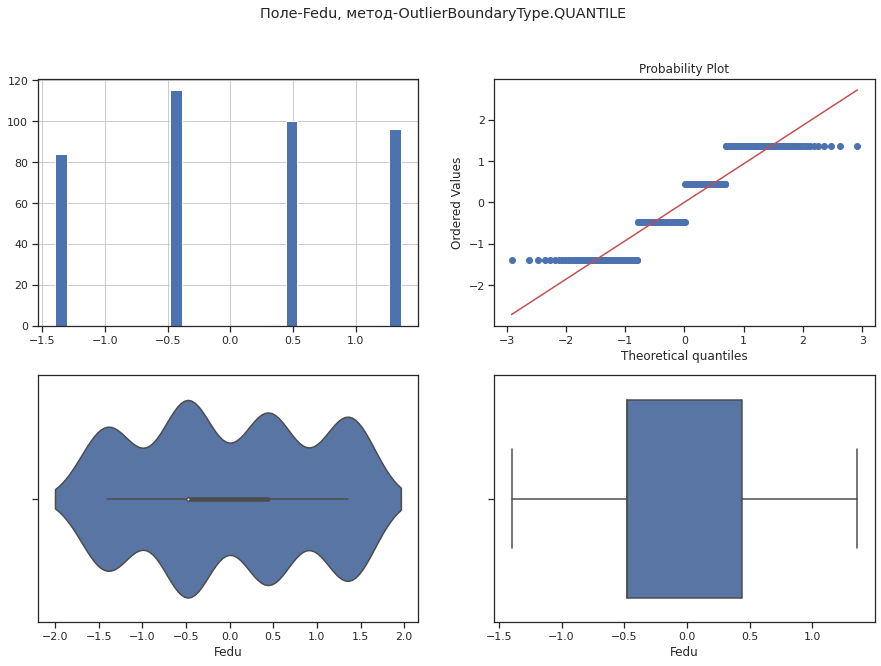

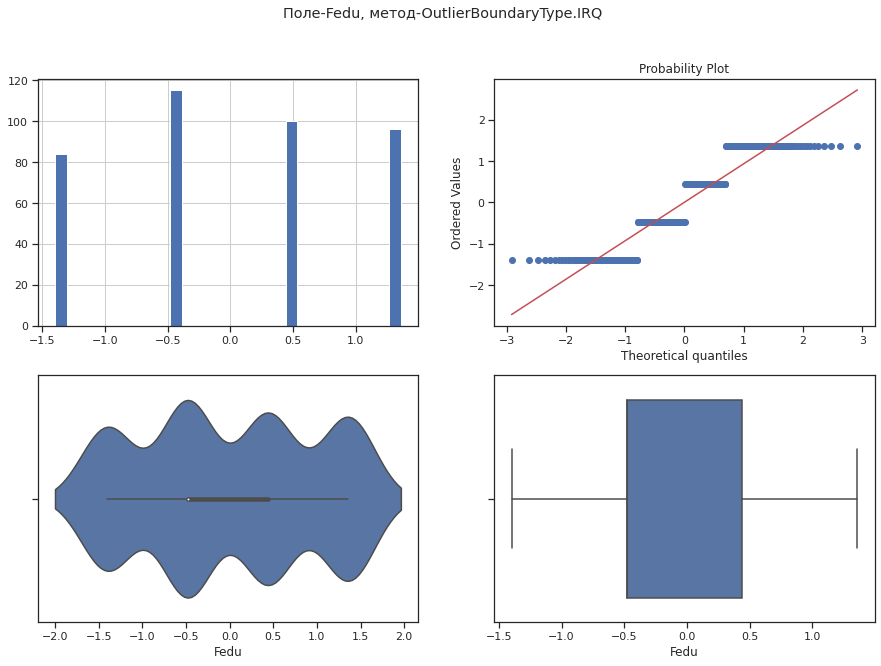

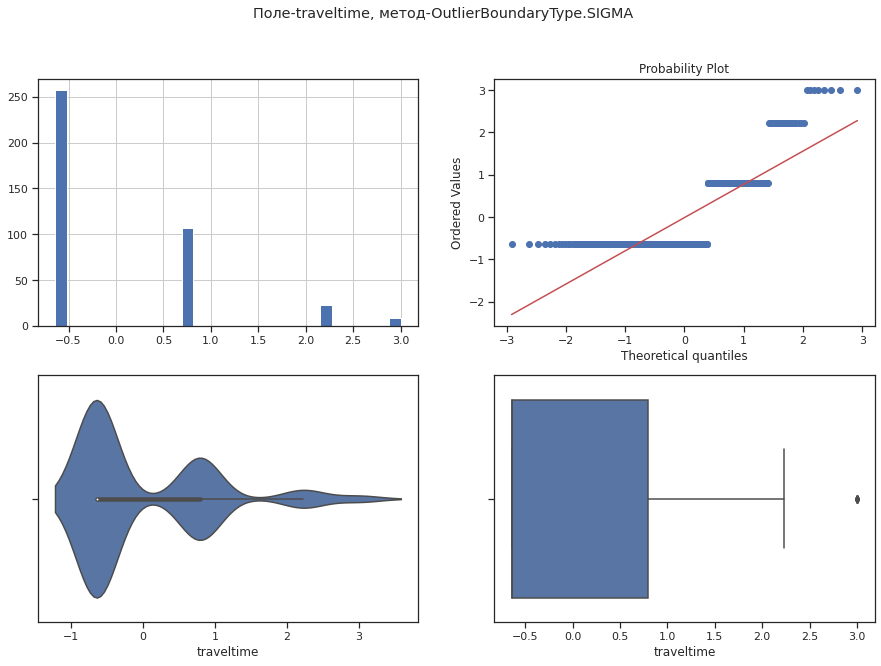

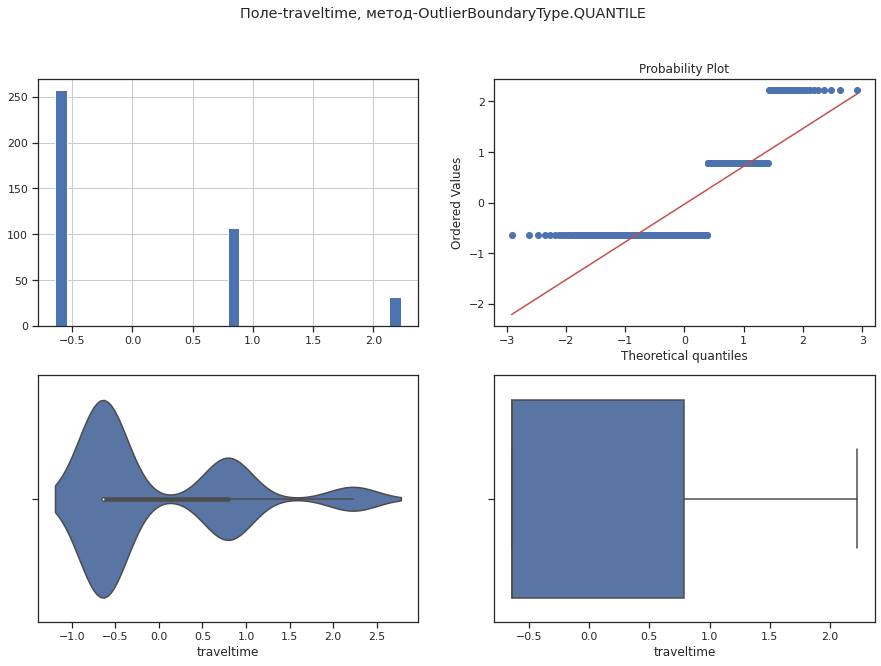

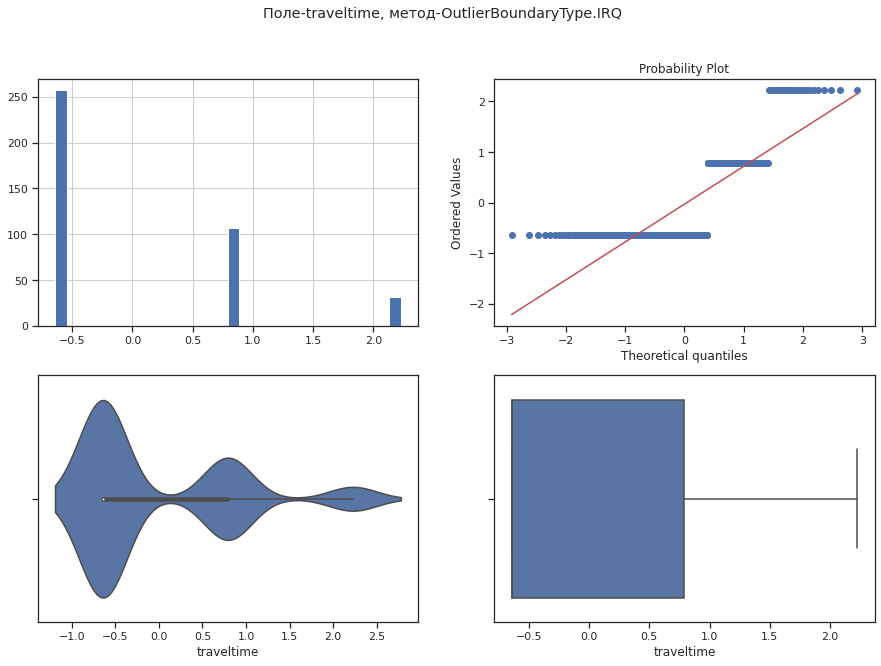

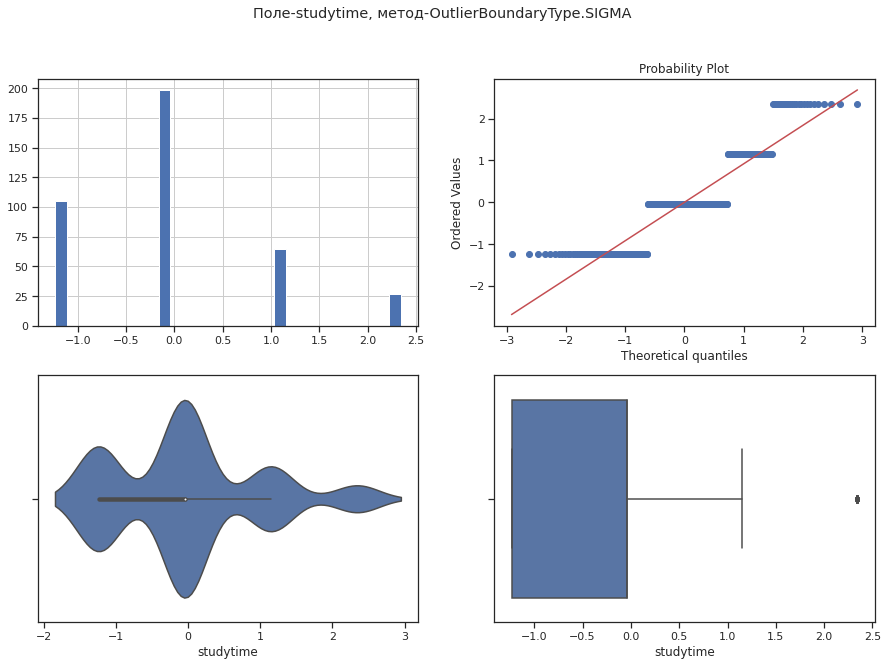

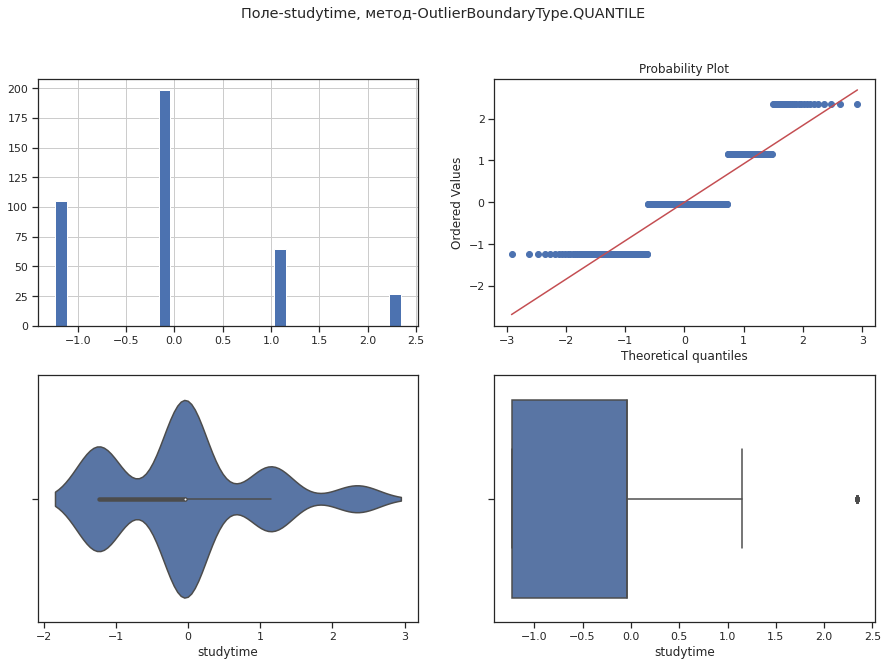

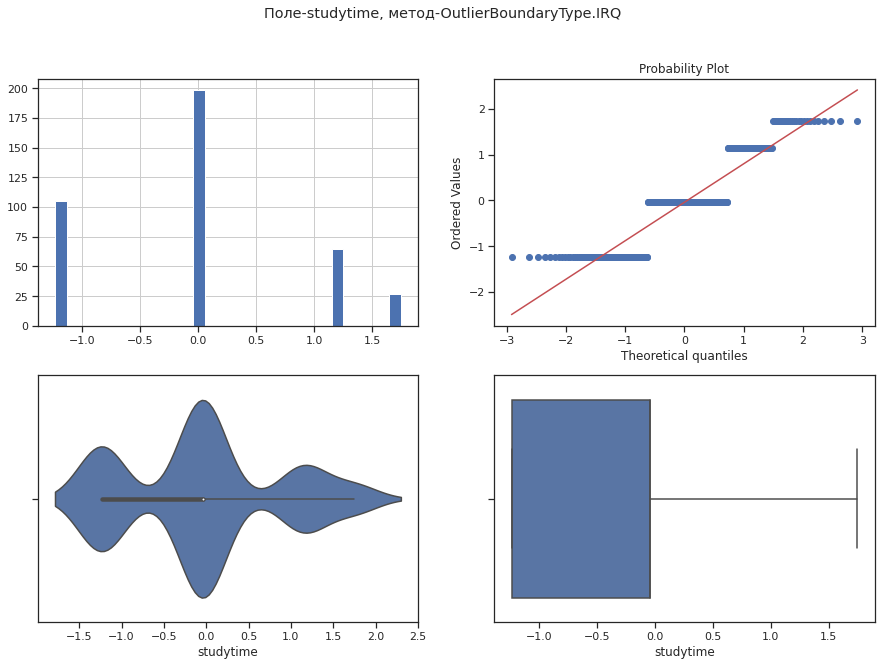

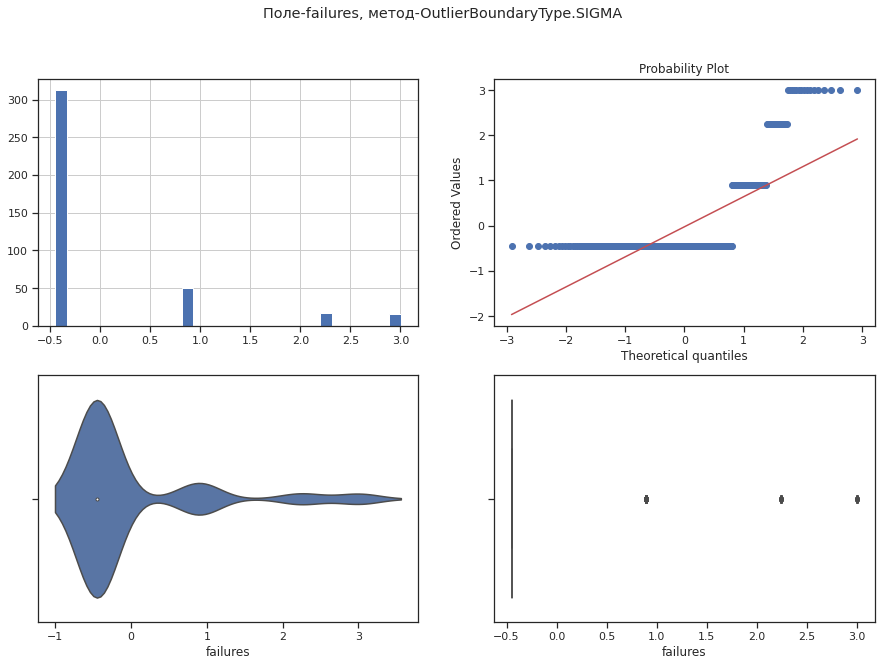

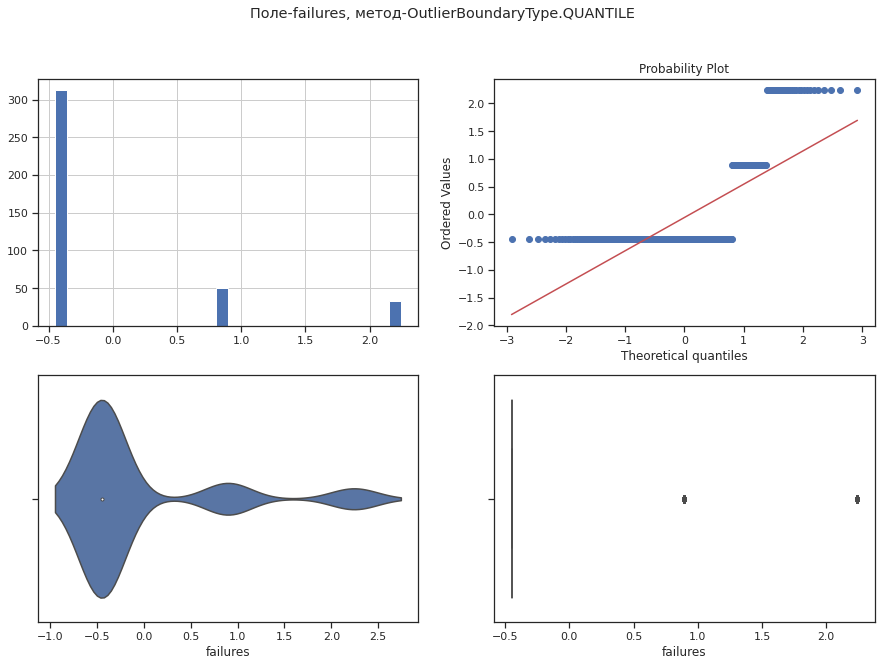

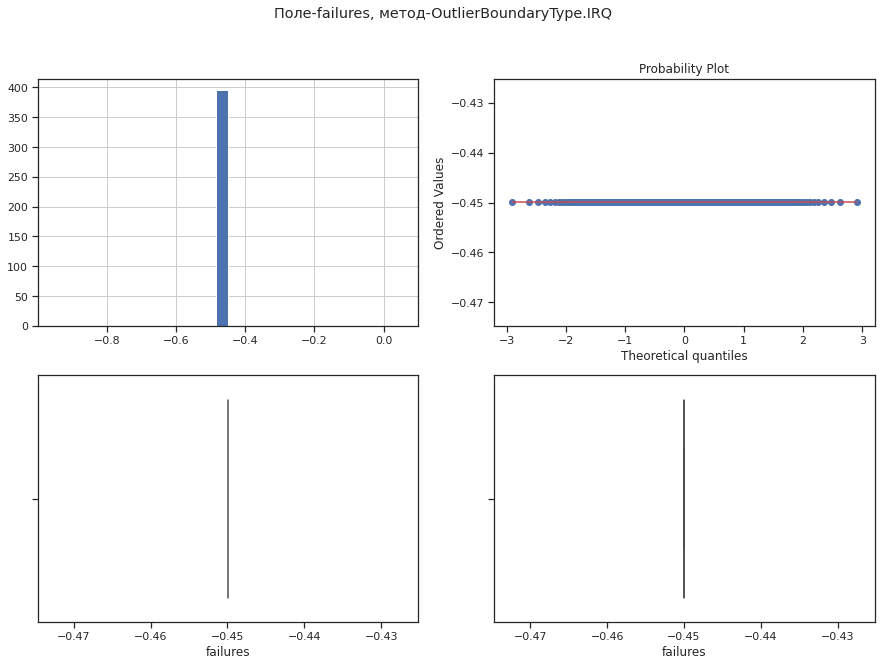

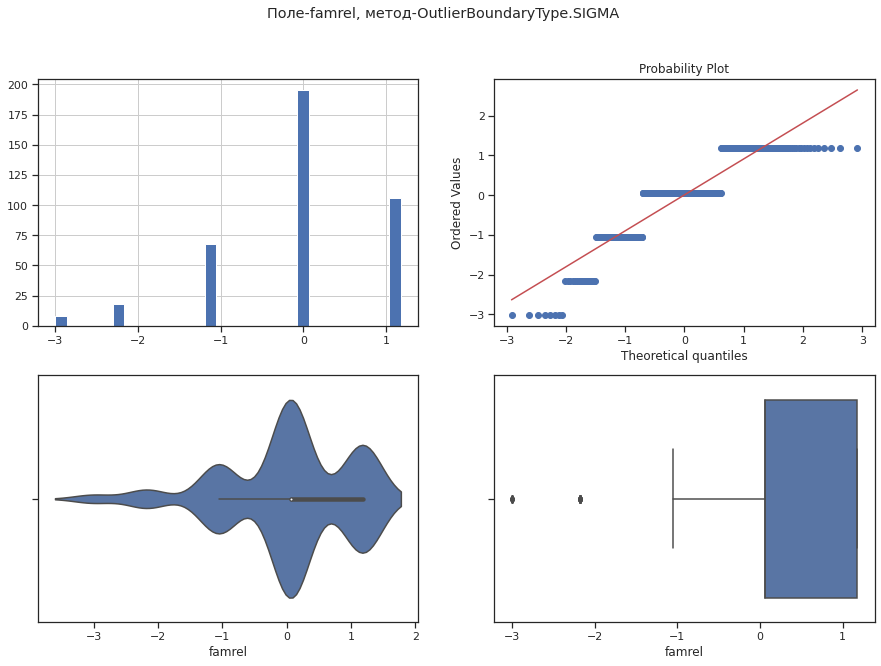

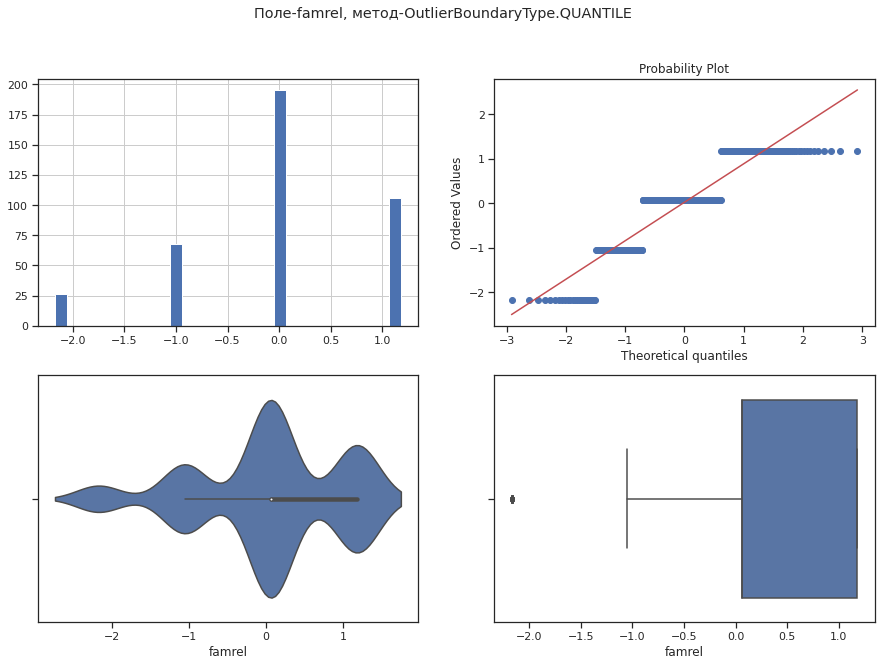

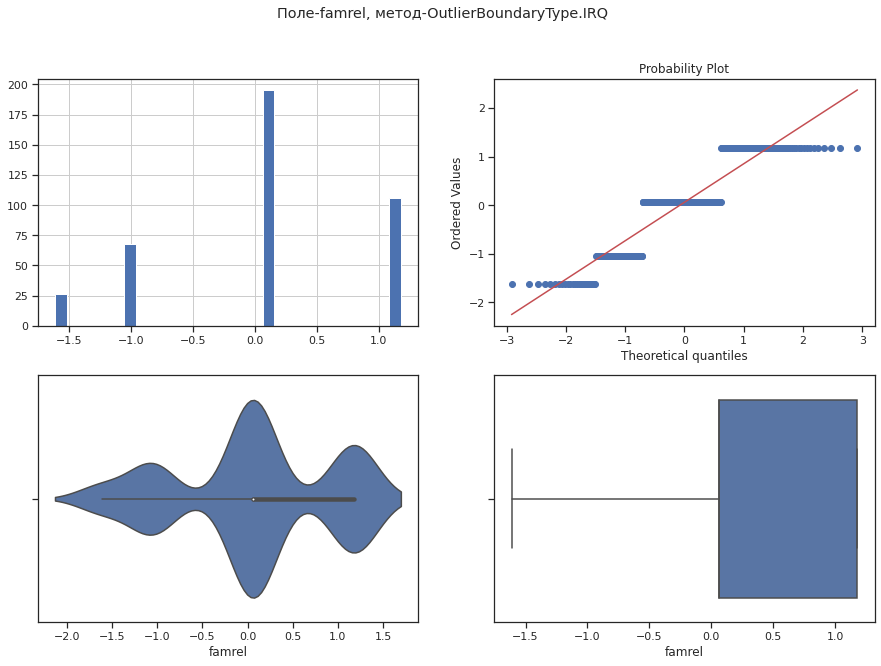

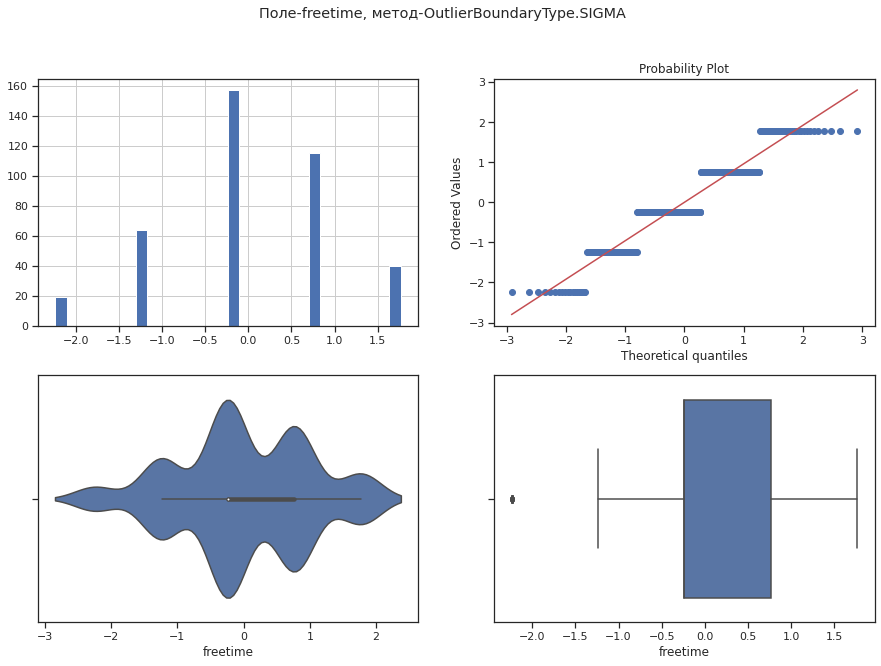

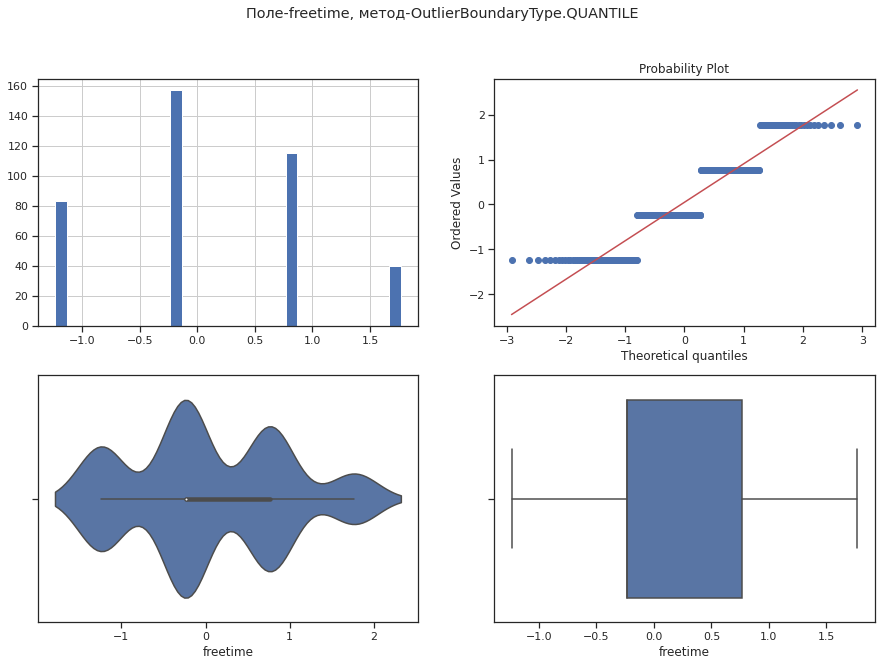

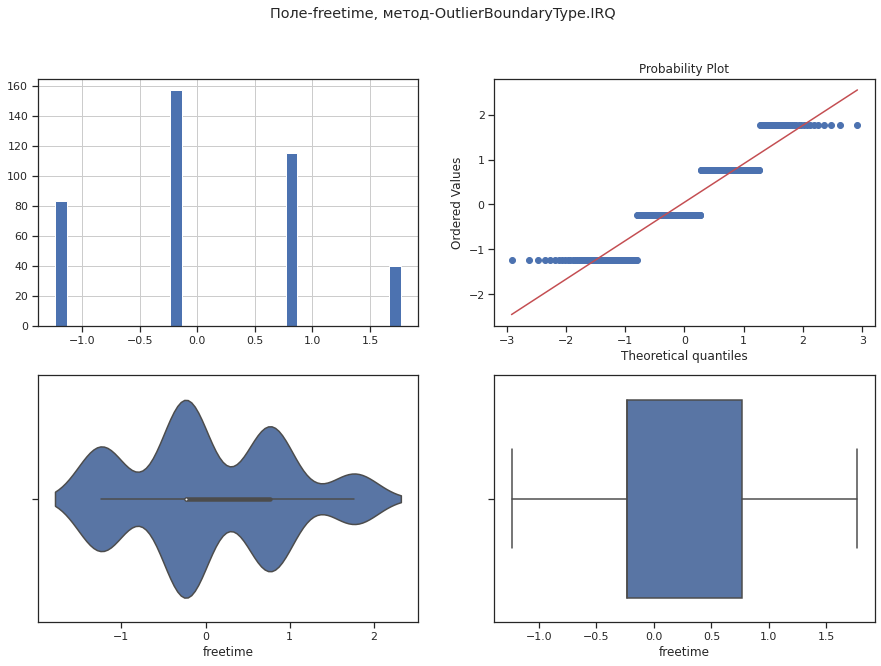

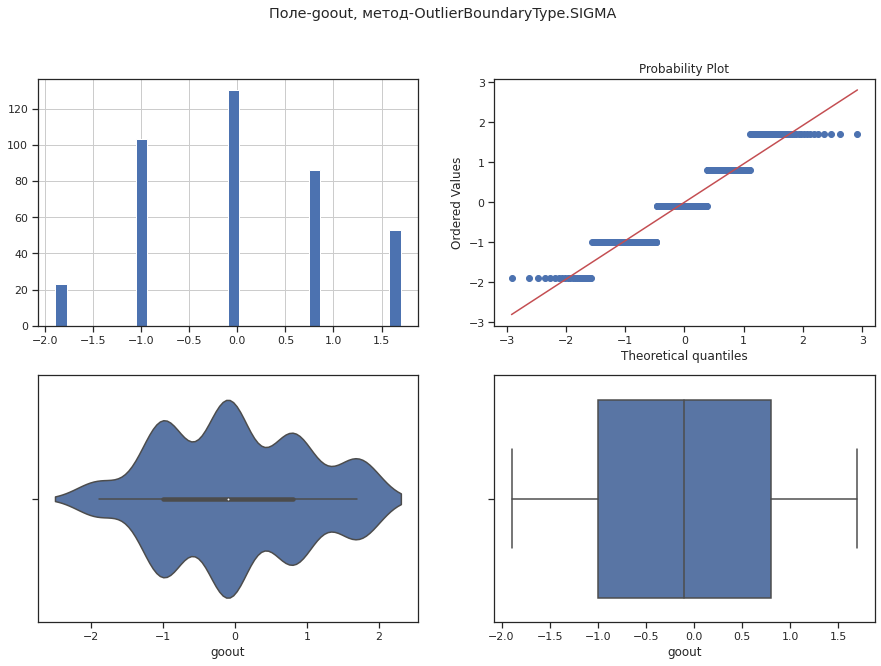

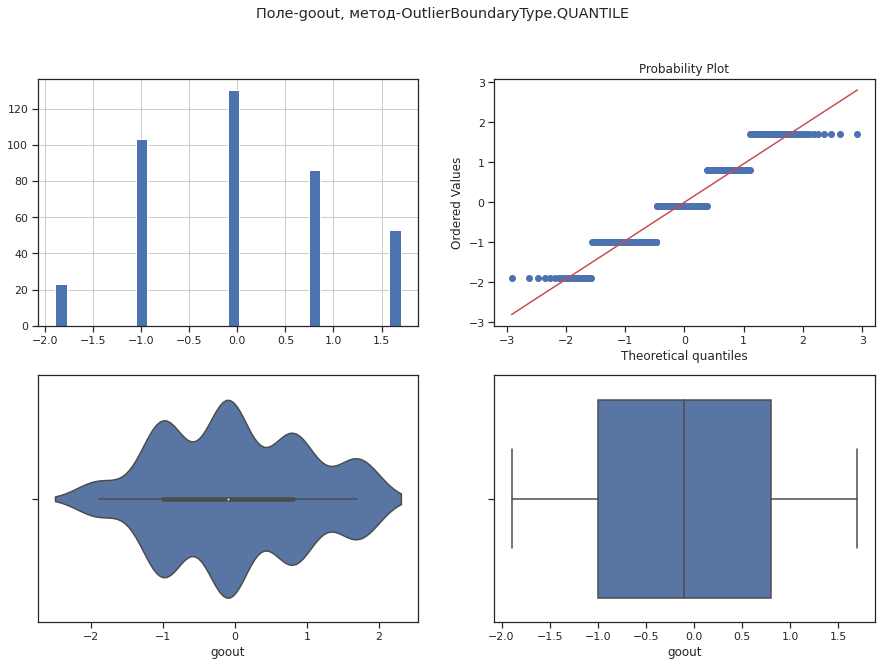

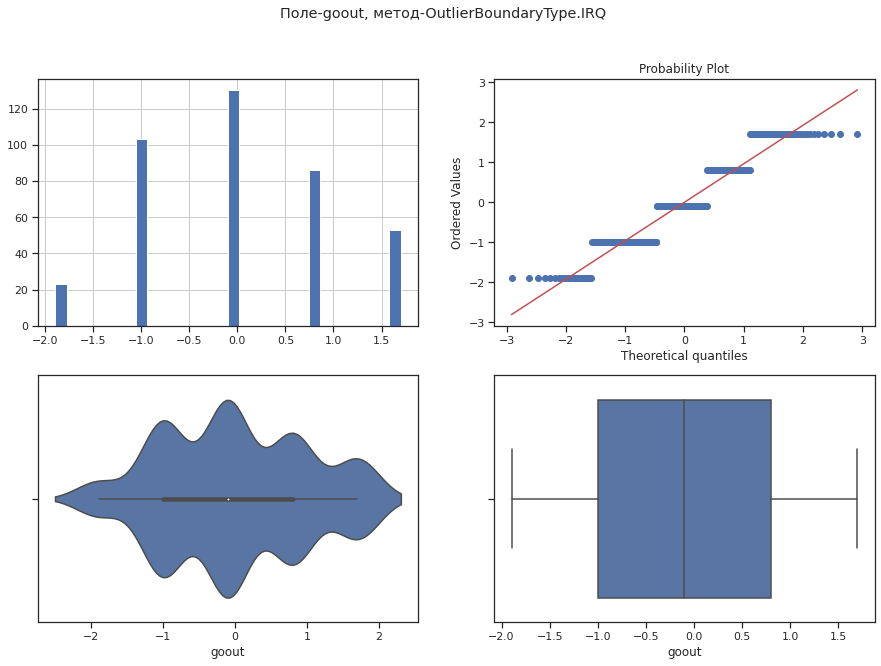

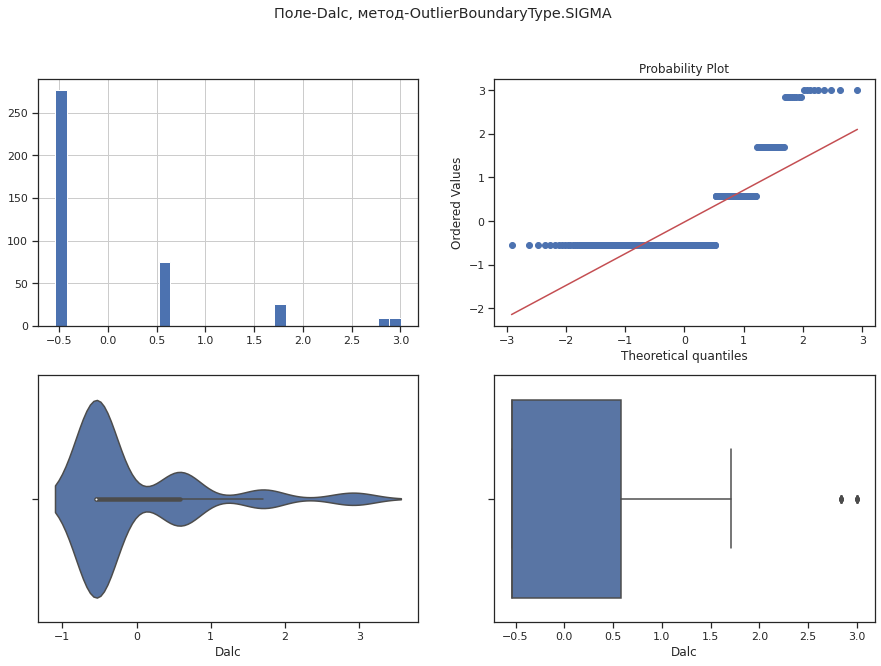

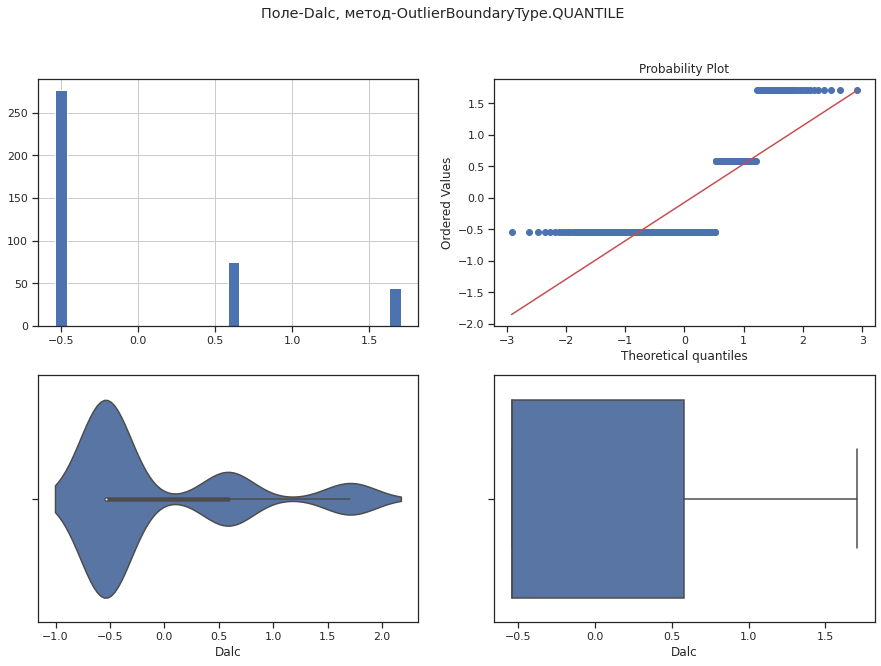

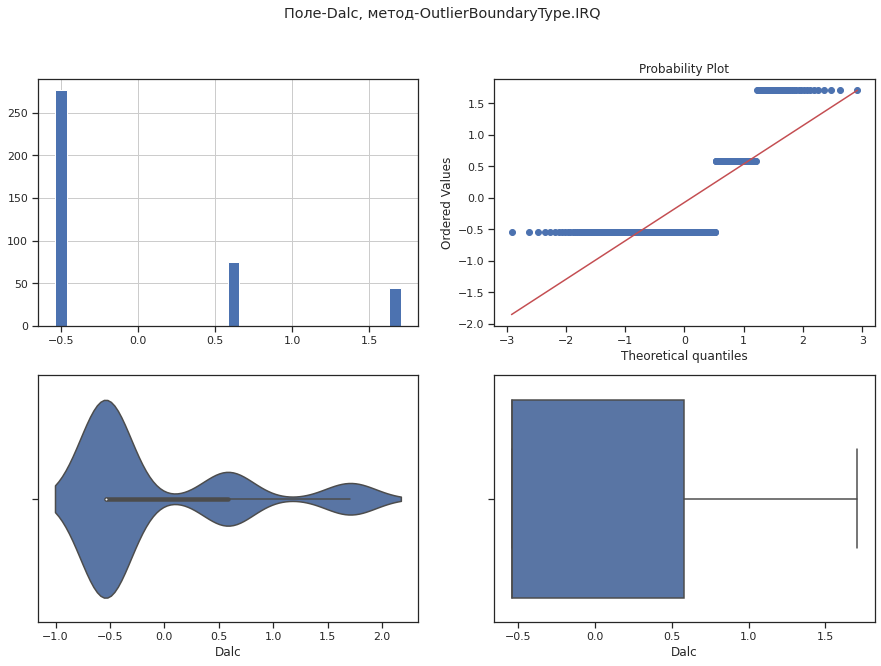

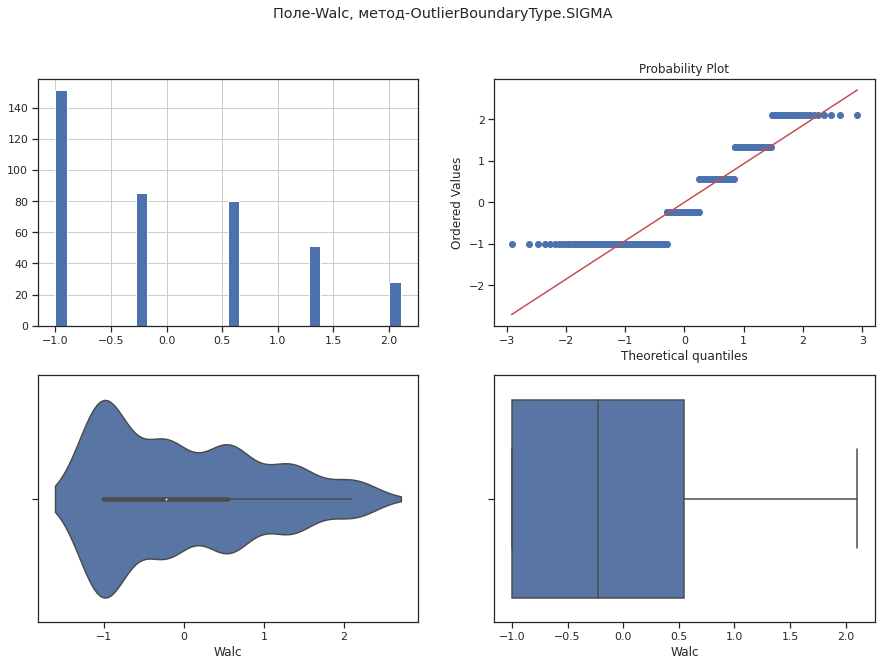

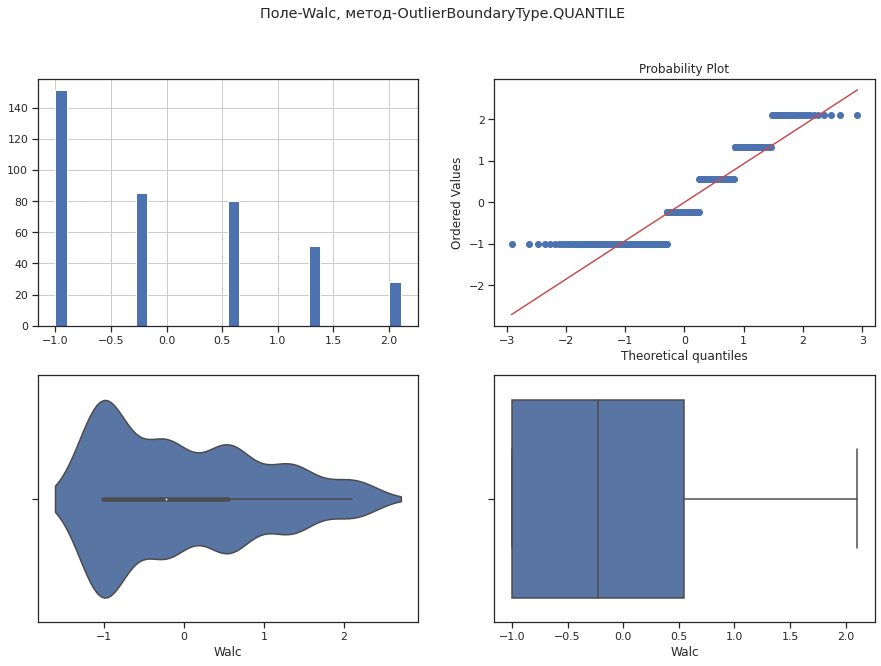

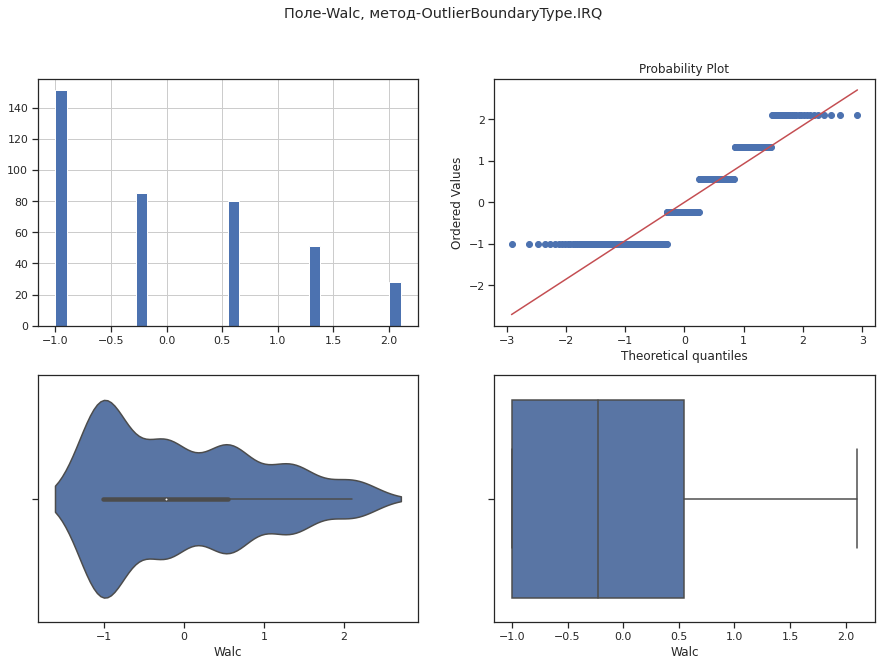

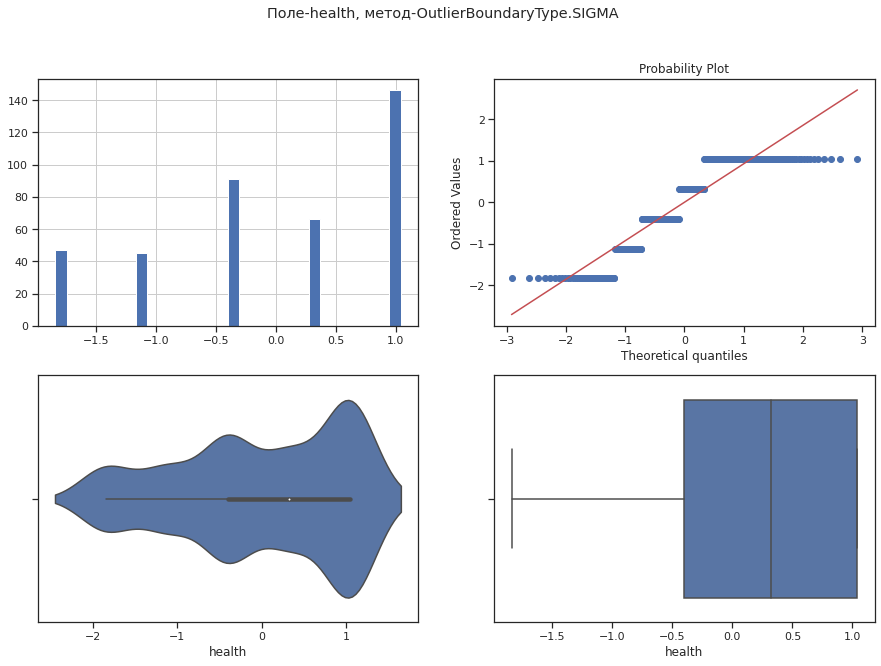

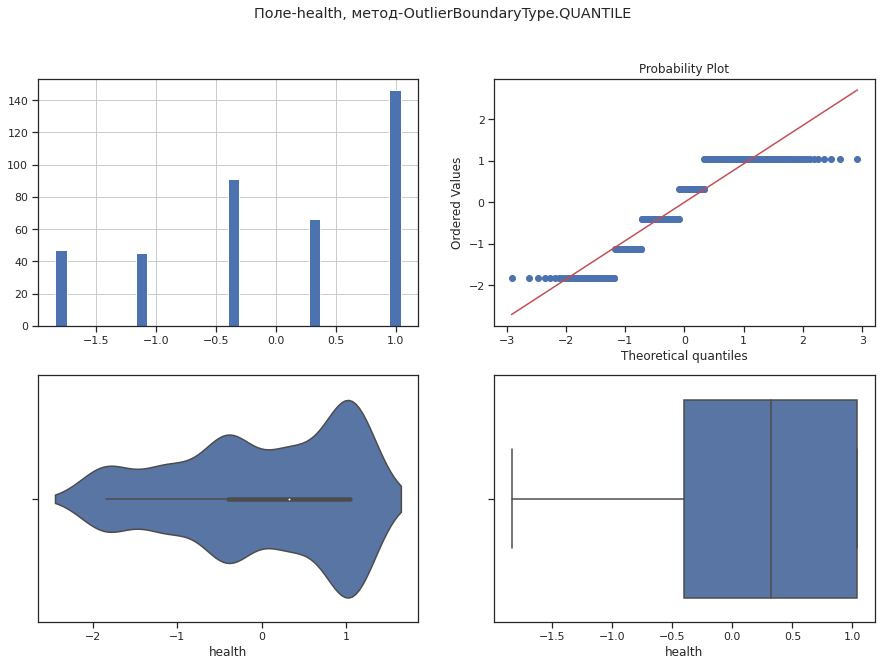

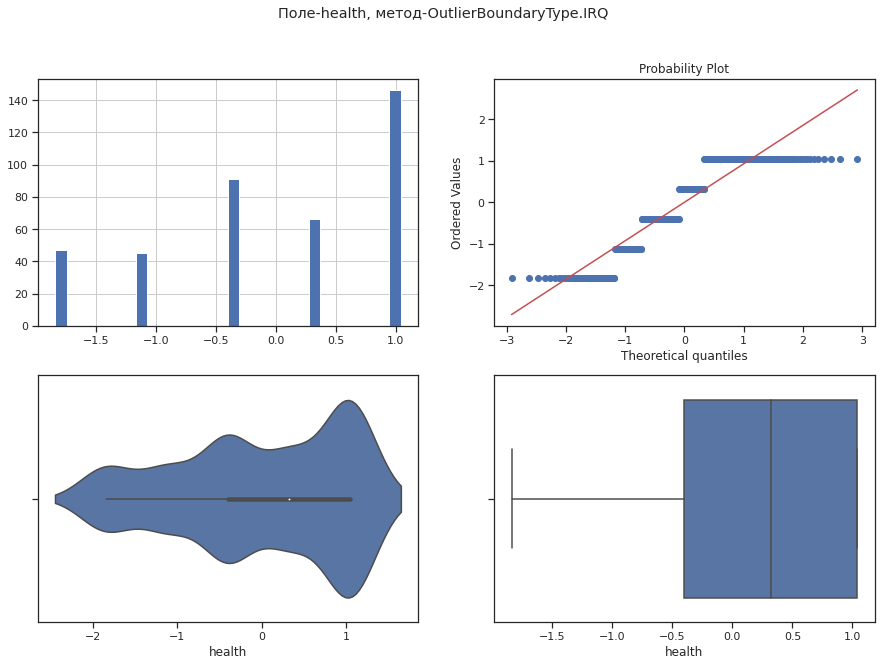

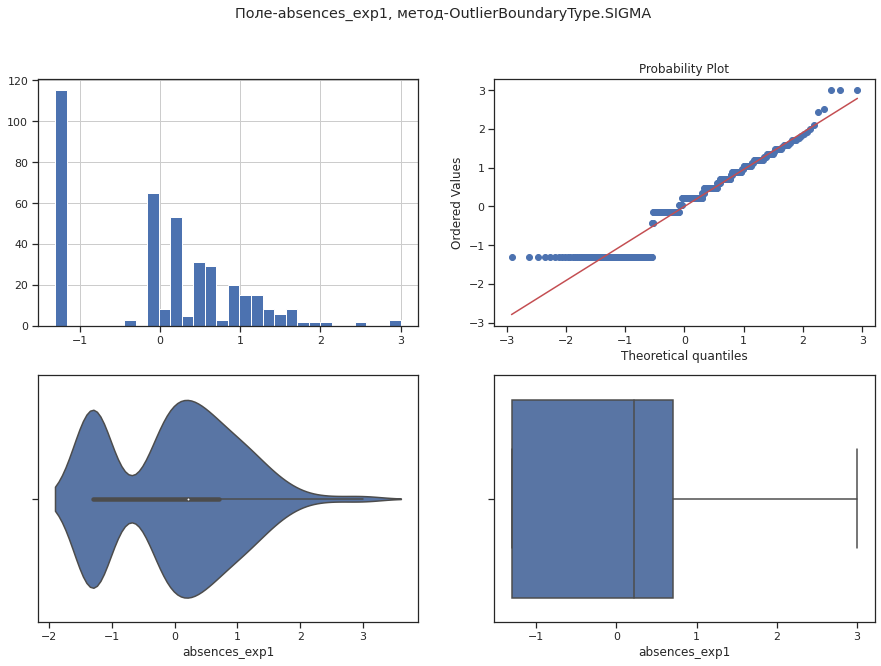

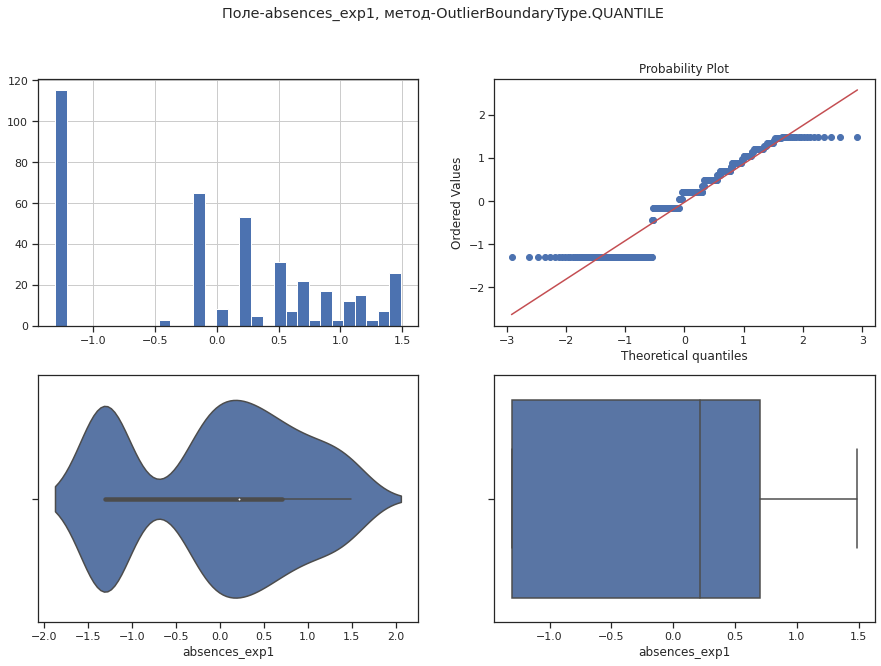

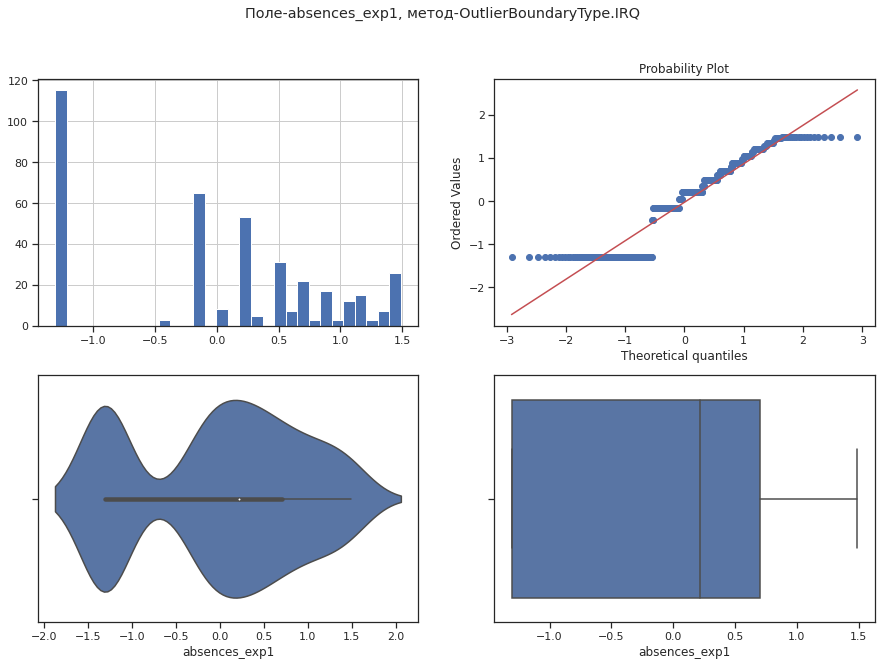

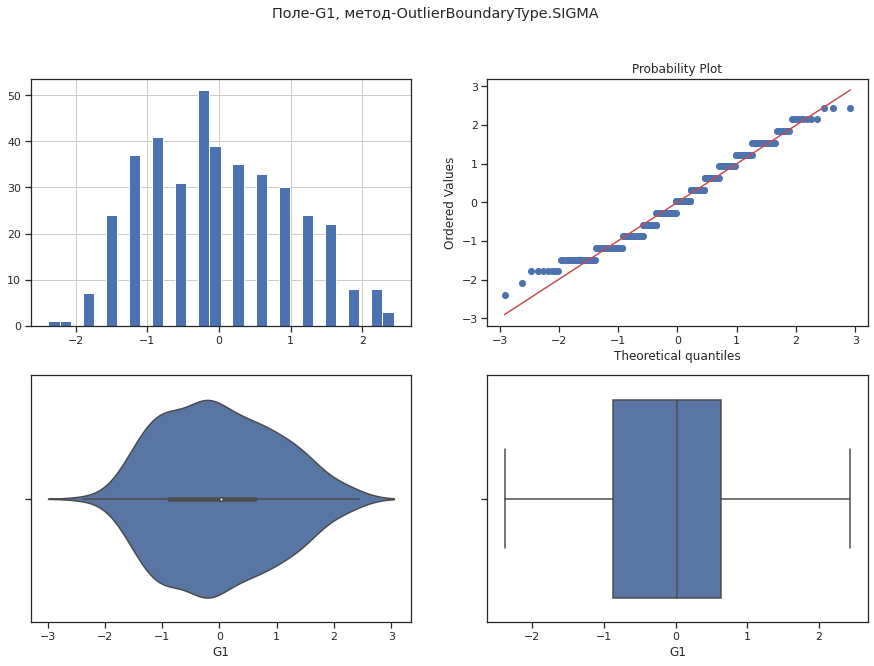

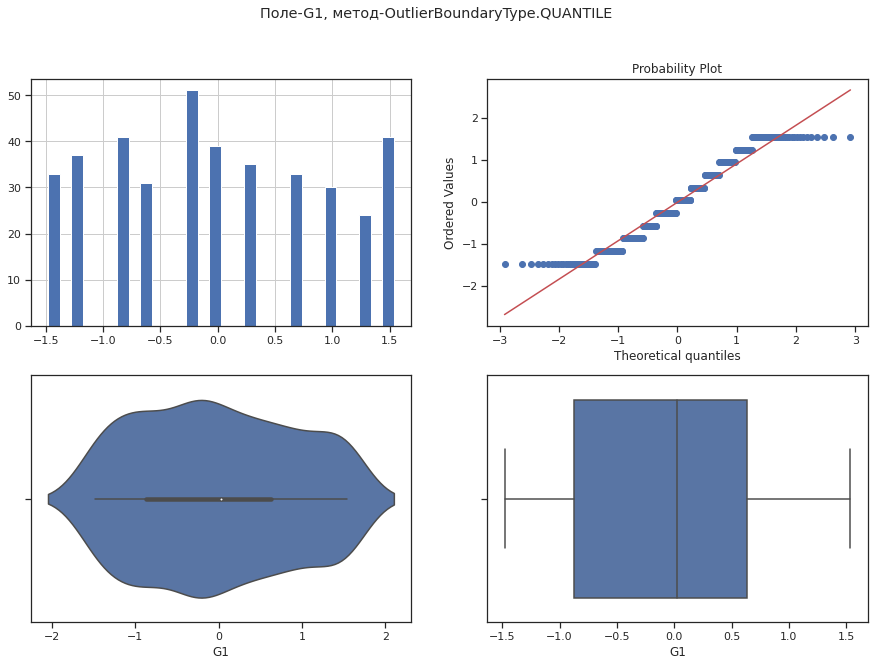

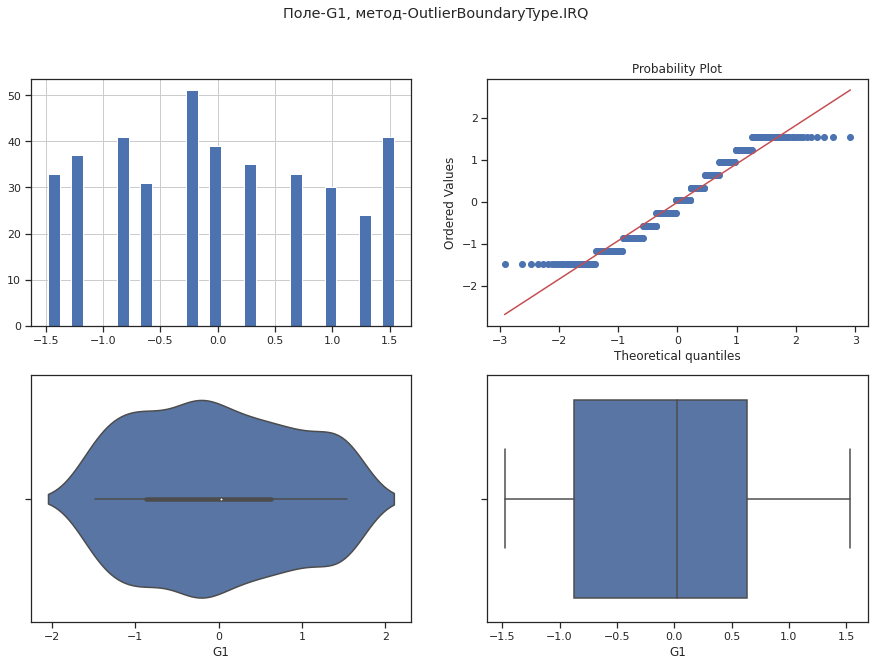

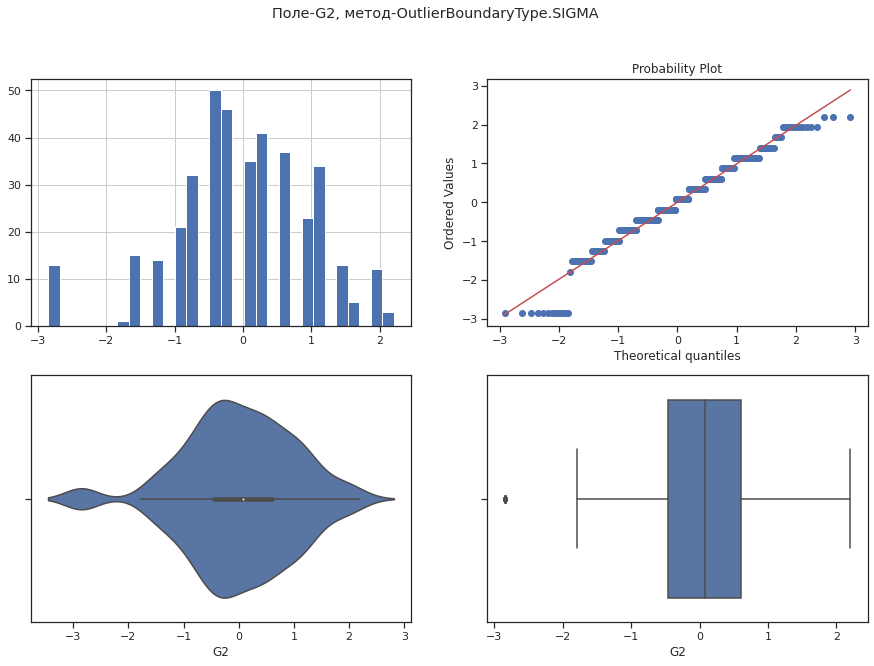

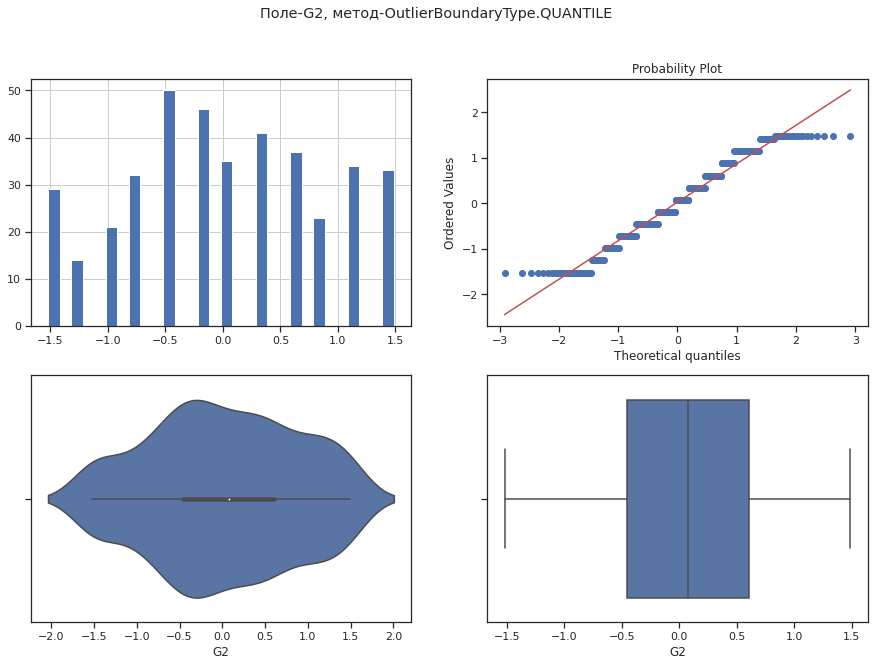

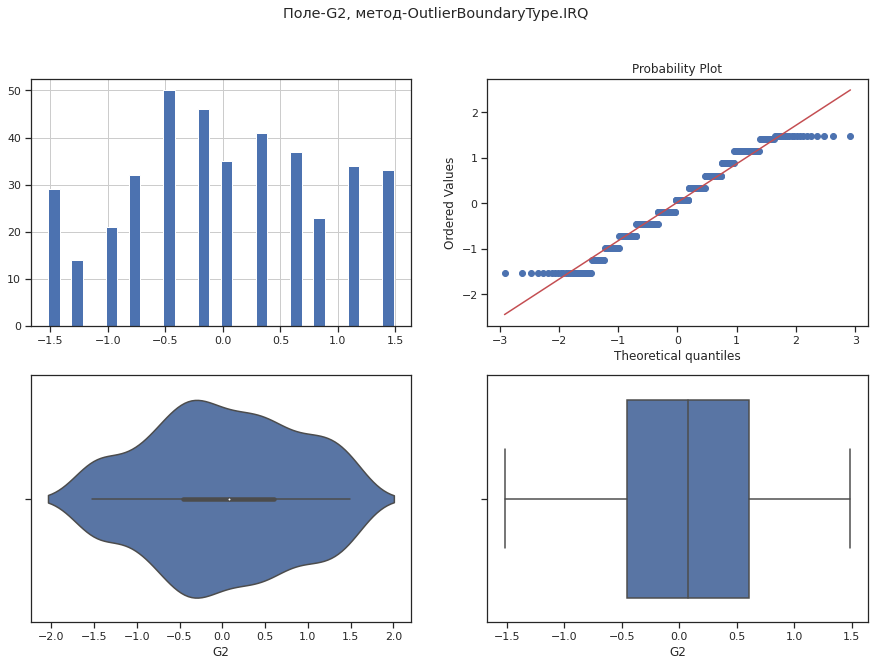

In [ ]:
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data4, col, obt)
        # Изменение данных
        data4[col] = np.where(data4[col] > upper_boundary, upper_boundary, 
                                 np.where(data4[col] < lower_boundary, lower_boundary, data4[col]))
        title = 'Поле-{}, метод-{}'.format(col, obt)
        diagnostic_plots(data4, col, title)

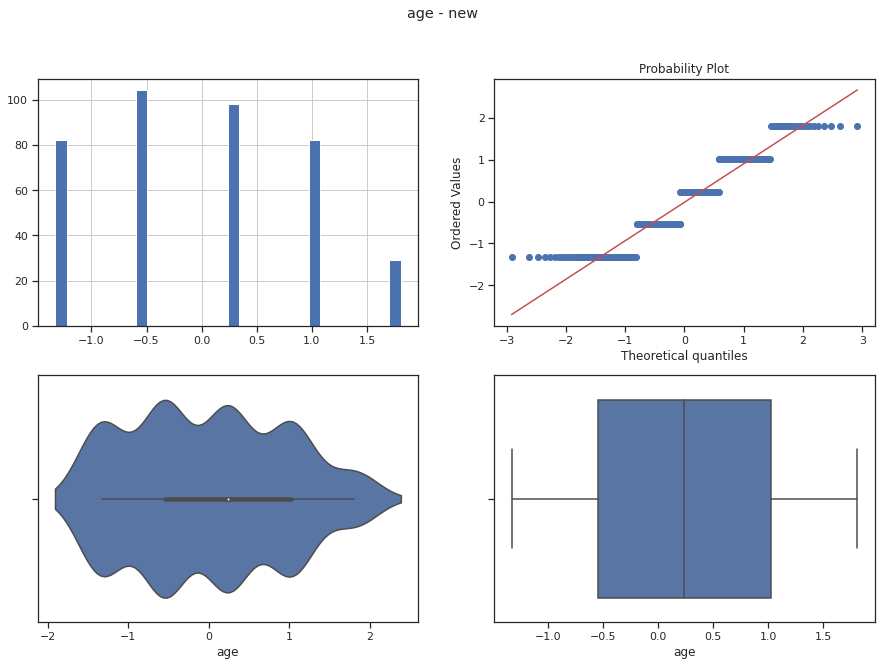

In [ ]:
diagnostic_plots(data4, 'age', 'age - new')

# Соединяем

In [ ]:
data5 = data4.copy()
data5.head()

age      Medu      Fedu  ...  absences_exp1        G1        G2
0  1.023046  1.143856  1.360371  ...       0.482502 -1.480807 -1.254791
1  0.238380 -1.600009 -1.399970  ...       0.214454 -1.480807 -1.520979
2 -1.330954 -1.600009 -1.399970  ...       0.888383 -1.179147 -0.722415
3 -1.330954  1.143856 -0.479857  ...      -0.154163  1.234133  0.874715
4 -0.546287  0.229234  0.440257  ...       0.214454 -1.480807 -0.190038

[5 rows x 15 columns]

In [ ]:
data2.head()

school  sex  age  address  famsize  ...  health  G1  G2  G3  absences_exp1
0       0    0   18        1        0  ...       3   5   6   6       2.047673
1       0    0   17        1        0  ...       3   5   5   6       1.741101
2       0    0   15        1        1  ...       3   7   8  10       2.511886
3       0    0   15        1        0  ...       5  15  14  15       1.319508
4       0    0   16        1        0  ...       5   6  10  10       1.741101

[5 rows x 33 columns]

In [ ]:
replace_columns = ['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences_exp1','G1','G2']
for i in replace_columns: 
  data2[i]=data5[i]

In [ ]:
data2.head()

school  sex       age  address  ...        G1        G2  G3  absences_exp1
0       0    0  1.023046        1  ... -1.480807 -1.254791   6       0.482502
1       0    0  0.238380        1  ... -1.480807 -1.520979   6       0.214454
2       0    0 -1.330954        1  ... -1.179147 -0.722415  10       0.888383
3       0    0 -1.330954        1  ...  1.234133  0.874715  15      -0.154163
4       0    0 -0.546287        1  ... -1.480807 -0.190038  10       0.214454

[5 rows x 33 columns]

# Обработка нестандартных признаков: не требуется

# Отбор признаков

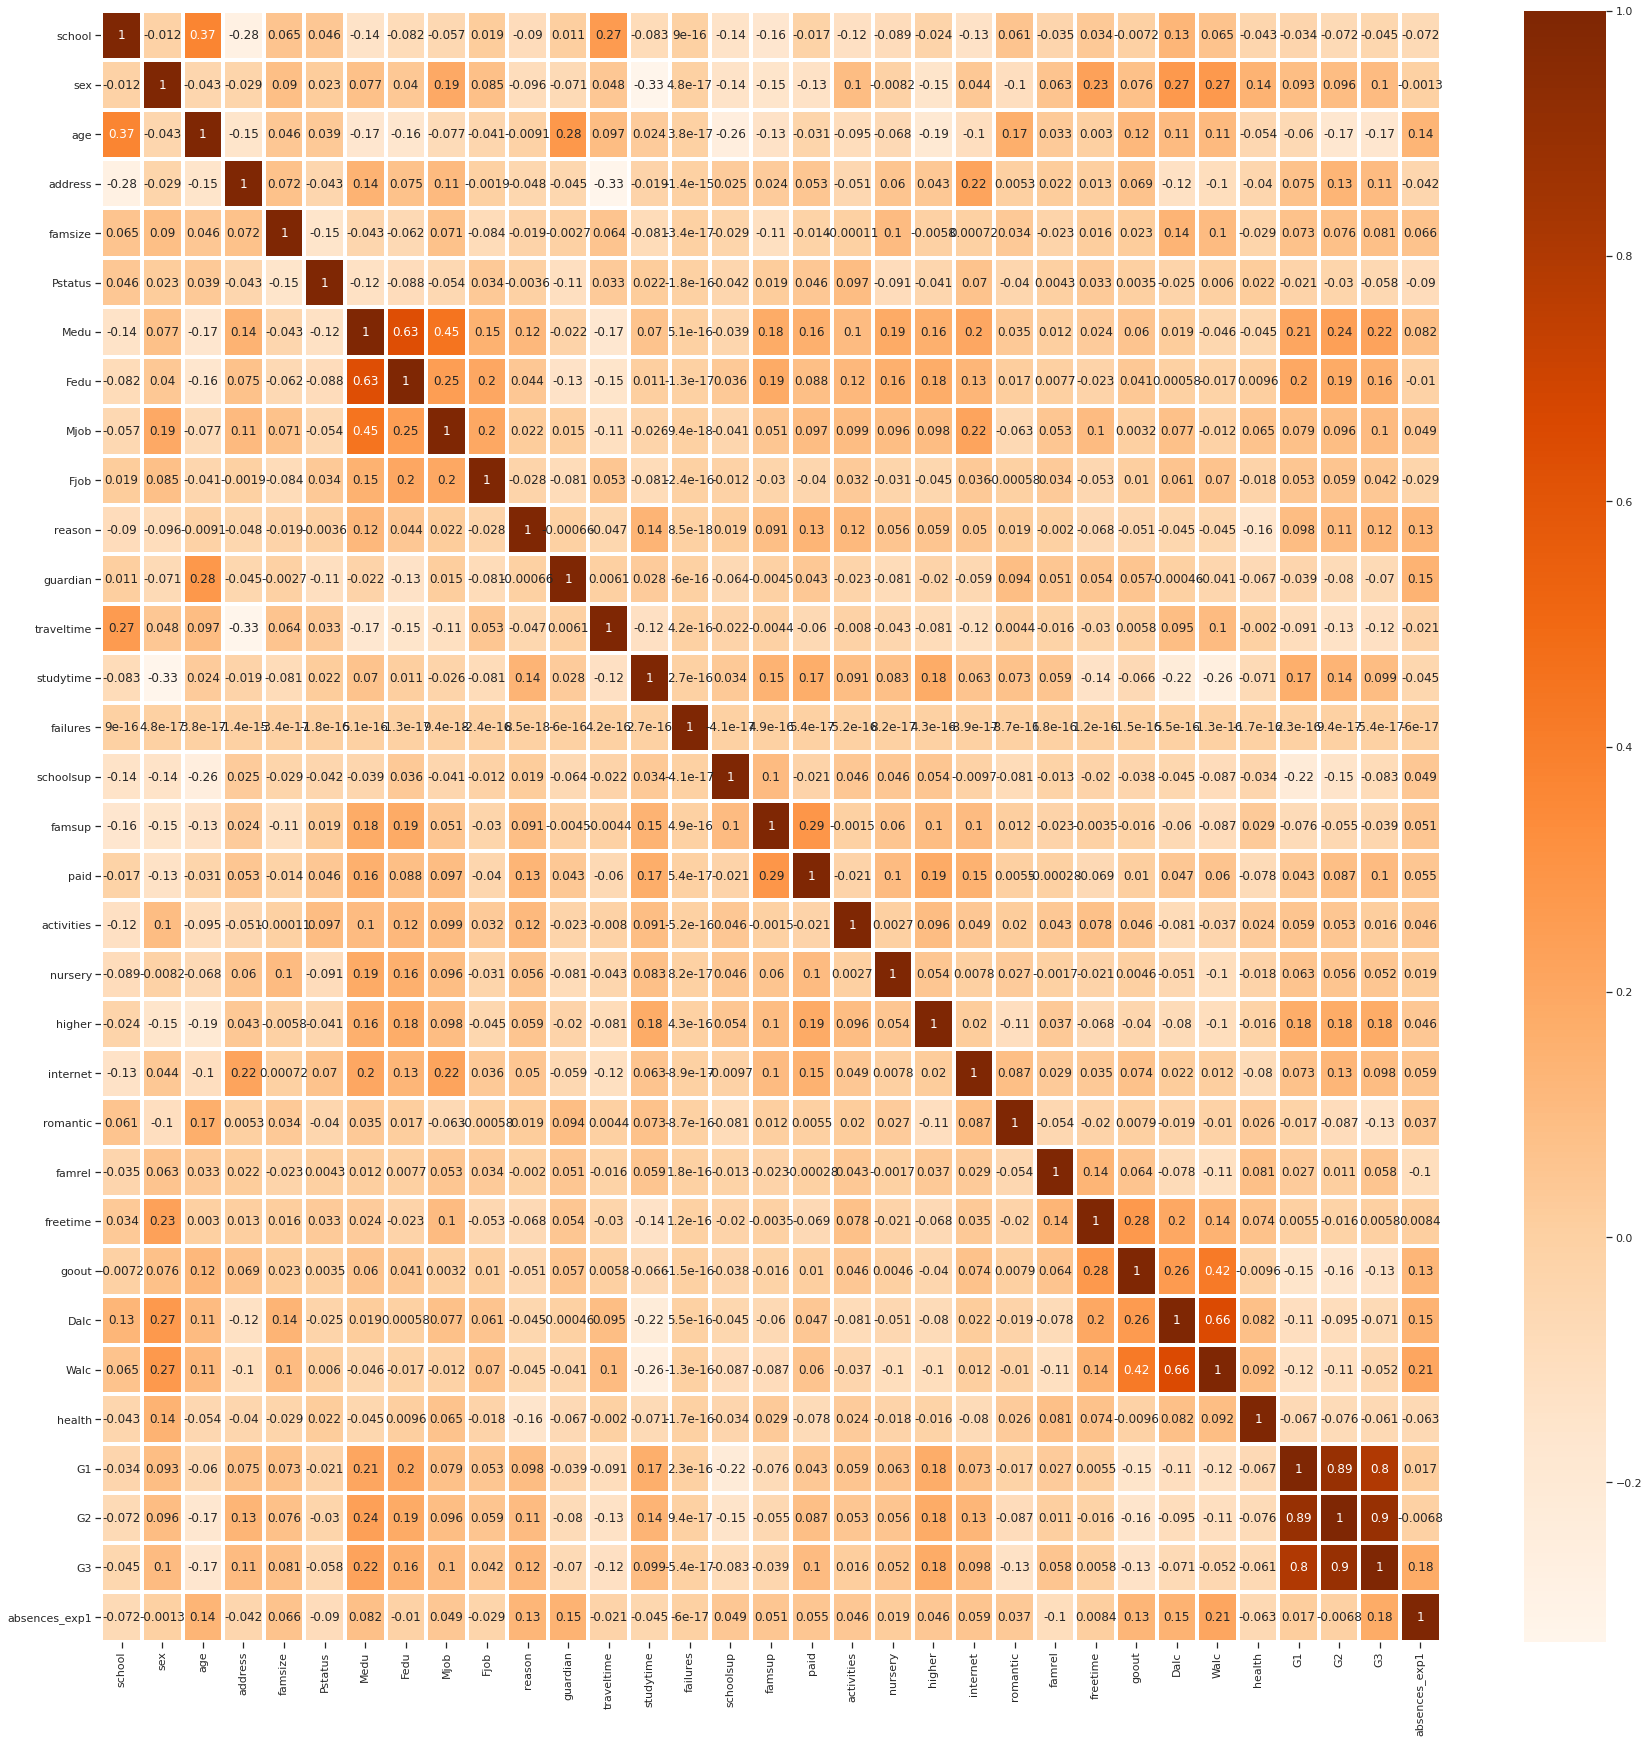

In [ ]:
data6 = data2.copy()
plt.figure(figsize=(30,30))
sns.heatmap(data6.corr(), cmap="Oranges", annot=True, linewidths=3)

In [ ]:
# Формирование DataFrame с сильными корреляциями
def make_corr_df(df):
    cr = data6.corr()
    cr = cr.abs().unstack() 
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= 0.8]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

In [ ]:
make_corr_df(data6)

f1  f2      corr
0  G2  G3  0.895755
1  G3  G2  0.895755
2  G1  G2  0.892269
3  G2  G1  0.892269

In [ ]:
# Обнаружение групп коррелирующих признаков
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # находим коррелирующие признаки
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

In [ ]:
# Группы коррелирующих признаков
corr_groups(make_corr_df(data6))

[['G3', 'G1', 'G2']]

# Другой выбор признаков

In [ ]:
data_new = data2.copy()
data_new.head()

school  sex       age  address  ...        G1        G2  G3  absences_exp1
0       0    0  1.023046        1  ... -1.480807 -1.254791   6       0.482502
1       0    0  0.238380        1  ... -1.480807 -1.520979   6       0.214454
2       0    0 -1.330954        1  ... -1.179147 -0.722415  10       0.888383
3       0    0 -1.330954        1  ...  1.234133  0.874715  15      -0.154163
4       0    0 -0.546287        1  ... -1.480807 -0.190038  10       0.214454

[5 rows x 33 columns]

In [ ]:
# DataFrame не содержащий целевой признак
X_ALL = data_new.drop('G3', axis=1)

In [ ]:
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

In [ ]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data_new['G3'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((316, 32), (79, 32))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
efs1 = EFS(knn, 
           min_features=2,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(X_train, y_train, custom_feature_names=X_ALL.columns)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

KeyboardInterrupt: ignored

# Еще одна попытка отбора признаков

In [ ]:
datafo = data2.copy()
datafo.head()

school  sex       age  address  ...        G1        G2  G3  absences_exp1
0       0    0  1.023046        1  ... -1.480807 -1.254791   6       0.482502
1       0    0  0.238380        1  ... -1.480807 -1.520979   6       0.214454
2       0    0 -1.330954        1  ... -1.179147 -0.722415  10       0.888383
3       0    0 -1.330954        1  ...  1.234133  0.874715  15      -0.154163
4       0    0 -0.546287        1  ... -1.480807 -0.190038  10       0.214454

[5 rows x 33 columns]

In [ ]:
# DataFrame не содержащий целевой признак
X_ALL = datafo.drop('G3', axis=1)

In [ ]:
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

In [ ]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, datafo['G3'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((316, 32), (79, 32))

In [ ]:
from sklearn.linear_model import LogisticRegression
# Используем L1-регуляризацию
e_lr1 = LogisticRegression(C=1000, solver='liblinear', penalty='l1', max_iter=500, random_state=1)
e_lr1.fit(X_train, y_train)
# Коэффициенты регрессии
e_lr1.coef_

array([[-5.39523998e+00,  9.34031358e+00,  5.33611194e+00,
         9.24360706e-01,  7.06166891e-01, -9.79451059e+00,
        -1.53848774e+00,  6.23027389e-01, -1.30800055e+00,
        -2.10485448e+00,  1.66984498e-01, -3.87929522e+00,
         1.54457672e+00,  3.15366255e+00,  2.56369073e+01,
        -3.30240778e+00,  4.00600960e+00,  3.49301273e+00,
         2.42457322e+00, -3.51529005e+00, -1.42877606e+00,
         2.20248431e-01,  3.44033783e+00, -3.38033712e+00,
        -3.87678059e+00,  0.00000000e+00,  5.84769675e+00,
        -4.58215577e+00, -2.73614560e+00, -8.86725563e-01,
        -2.00545233e+01, -1.83465878e+01],
       [ 0.00000000e+00, -7.79210611e-01,  6.88264413e-01,
         0.00000000e+00, -7.68552642e-01,  0.00000000e+00,
         3.50038832e+00,  0.00000000e+00, -1.17719126e+00,
        -3.42006576e+00,  5.11276837e-01,  0.00000000e+00,
         0.00000000e+00,  7.21955889e-02,  0.00000000e+00,
         0.00000000e+00, -5.43803981e+00,  0.00000000e+00,
        -2.52

In [ ]:
from sklearn.feature_selection import SelectFromModel
sel_e_lr1 = SelectFromModel(e_lr1)
sel_e_lr1.fit(X_train, y_train)
sel_e_lr1.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

# Обучаем модель (минимальная обработка данных)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = data_encoded.drop([data_encoded.columns[-1]], axis=1)
x

school  sex  age  address  famsize  ...  Walc  health  absences  G1  G2
0         0    0   18        1        0  ...     1       3         6   5   6
1         0    0   17        1        0  ...     1       3         4   5   5
2         0    0   15        1        1  ...     3       3        10   7   8
3         0    0   15        1        0  ...     1       5         2  15  14
4         0    0   16        1        0  ...     2       5         4   6  10
..      ...  ...  ...      ...      ...  ...   ...     ...       ...  ..  ..
390       1    1   20        1        1  ...     5       4        11   9   9
391       1    1   17        1        1  ...     4       2         3  14  16
392       1    1   21        0        0  ...     3       3         3  10   8
393       1    1   18        0        1  ...     4       5         0  11  12
394       1    1   19        1        1  ...     3       5         5   8   9

[395 rows x 32 columns]

In [ ]:
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=x.columns)
    return res

In [ ]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(x, data_encoded['G3'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape, y_train.shape, y_test.shape

((316, 32), (79, 32), (316,), (79,))

In [ ]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [ ]:
clas_models_dict = {'LinR': LinearRegression(), 
                    'SVR': SVR(),
                    'KNN_5':KNeighborsRegressor(n_neighbors=5),
                    'Tree':DecisionTreeRegressor(random_state=1),
                    'GB': GradientBoostingRegressor(random_state=1),
                    'RF':RandomForestRegressor(n_estimators=50, random_state=1)}

In [ ]:
X_data_dict = {'Basic': (X_train_df, X_test_df)}

In [ ]:
def test_models(clas_models_dict, X_train, X_test, y_train, y_test):
    
    logger = MetricLogger()
    
    for model_name, model in clas_models_dict.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        logger.add(model_name, 'Basic', mse)
            
    return logger

In [ ]:
logger = test_models(clas_models_dict, X_train_df, X_test_df, y_train, y_test)

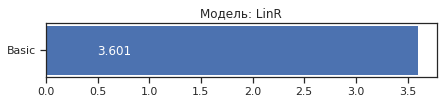

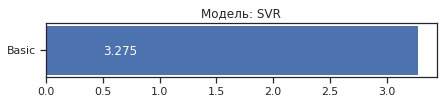

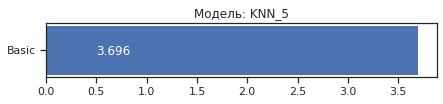

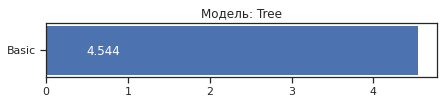

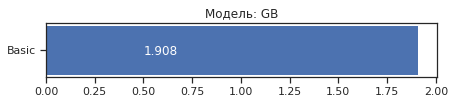

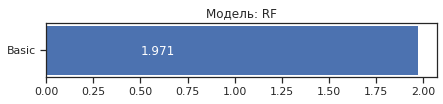

In [ ]:
# Построим графики метрик качества модели
for model in clas_models_dict:
    logger.plot('Модель: ' + model, model, figsize=(7, 1))

# Обучаем модель (полная обработка данных)

In [ ]:
data_res = datafo.copy()
# data_res = data_res[['absences_exp1','higher','Medu','goout','romantic','age','G2','G3']]
data_res.head()

school  sex       age  address  ...        G1        G2  G3  absences_exp1
0       0    0  1.023046        1  ... -1.480807 -1.254791   6       0.482502
1       0    0  0.238380        1  ... -1.480807 -1.520979   6       0.214454
2       0    0 -1.330954        1  ... -1.179147 -0.722415  10       0.888383
3       0    0 -1.330954        1  ...  1.234133  0.874715  15      -0.154163
4       0    0 -0.546287        1  ... -1.480807 -0.190038  10       0.214454

[5 rows x 33 columns]

In [ ]:
x = data_res.drop([data_res.columns[-1]], axis=1)
x

school  sex       age  address  ...    health        G1        G2  G3
0         0    0  1.023046        1  ... -0.399289 -1.480807 -1.254791   6
1         0    0  0.238380        1  ... -0.399289 -1.480807 -1.520979   6
2         0    0 -1.330954        1  ... -0.399289 -1.179147 -0.722415  10
3         0    0 -1.330954        1  ...  1.041070  1.234133  0.874715  15
4         0    0 -0.546287        1  ...  1.041070 -1.480807 -0.190038  10
..      ...  ...       ...      ...  ...       ...       ...       ...  ..
390       1    1  1.807713        1  ...  0.320890 -0.575827 -0.456226   9
391       1    1  0.238380        1  ... -1.119469  0.932473  1.407091  16
392       1    1  1.807713        0  ... -0.399289 -0.274167 -0.722415   7
393       1    1  1.023046        0  ...  1.041070  0.027493  0.342338  10
394       1    1  1.807713        1  ...  1.041070 -0.877487 -0.456226   9

[395 rows x 32 columns]

In [ ]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(x, data_res['G3'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape, y_train.shape, y_test.shape

((316, 32), (79, 32), (316,), (79,))

In [ ]:
X_data_dict = {'Basic': (X_train_df, X_test_df)}

In [ ]:
logger = test_models(clas_models_dict, X_train_df, X_test_df, y_train, y_test)

ValueError: ignored

<Figure size 720x720 with 1 Axes>

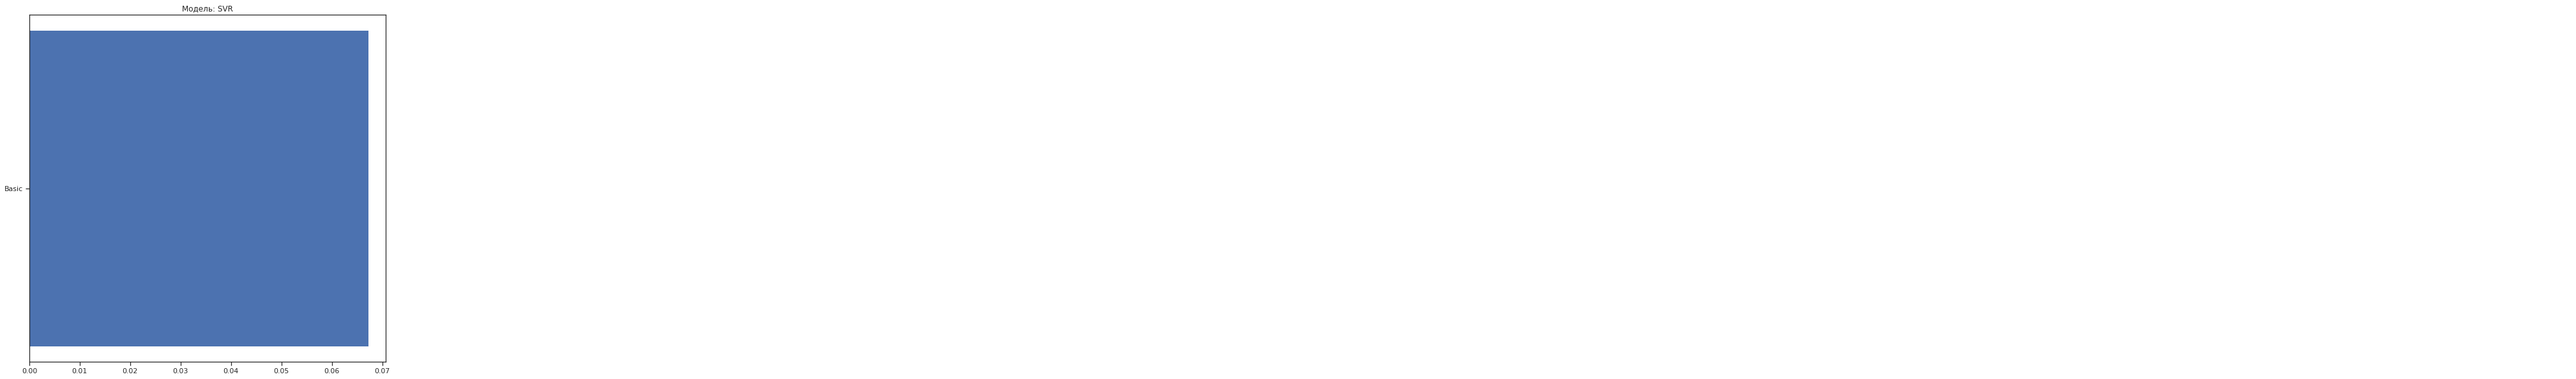

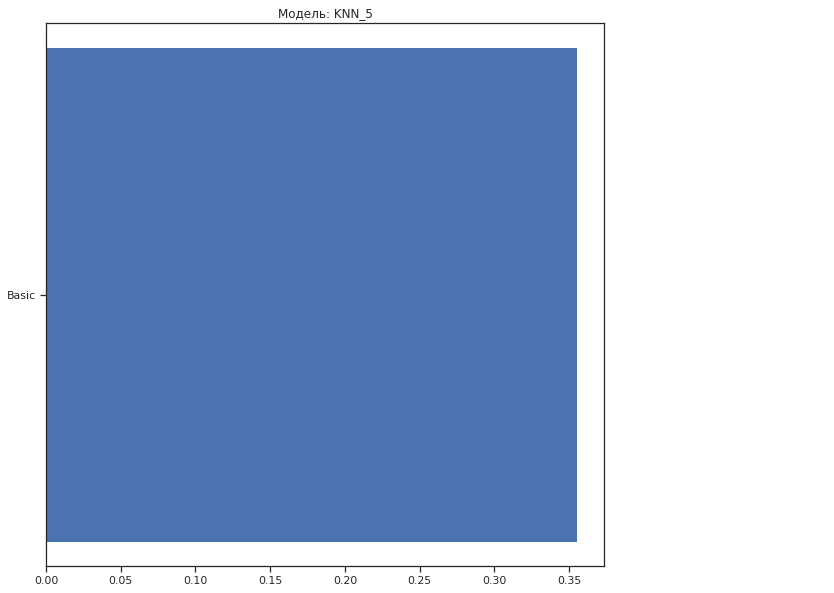

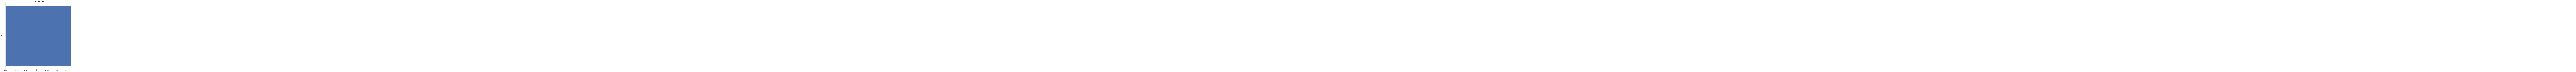

ValueError: ignored

<Figure size 720x720 with 1 Axes>

ValueError: ignored

<Figure size 720x720 with 1 Axes>

In [ ]:
# Построим графики метрик качества модели
for model in clas_models_dict:
    logger.plot('Модель: ' + model, model, figsize=(10, 10))

# AUTOML

In [ ]:
!pip3 install mljar-supervised
!pip3 install delayed

     |████████████████████████████████| 112kB 3.9MB/s 
     |████████████████████████████████| 15.3MB 278kB/s 
     |████████████████████████████████| 9.9MB 42.1MB/s 
     |████████████████████████████████| 27.4MB 108kB/s 
     |████████████████████████████████| 22.3MB 1.6MB/s 
     |████████████████████████████████| 157.5MB 54kB/s 
     |████████████████████████████████| 1.8MB 14.0MB/s 
     |████████████████████████████████| 65.7MB 149kB/s 
     |████████████████████████████████| 61kB 5.4MB/s 
     |████████████████████████████████| 327kB 10.1MB/s 
     |████████████████████████████████| 368kB 21.2MB/s 
     |████████████████████████████████| 81kB 5.2MB/s 
     |████████████████████████████████| 296kB 29.6MB/s 
     |████████████████████████████████| 81kB 7.4MB/s 
     |████████████████████████████████| 174kB 43.4MB/s 
     |████████████████████████████████| 51kB 5.2MB/s 
     |████████████████████████████████| 143kB 42.8MB/s 
     |████████████████████████████████| 112kB 39.5MB/s 
 

     |████████████████████████████████| 81kB 2.7MB/s 
     |████████████████████████████████| 92kB 6.7MB/s 


In [ ]:
from supervised.automl import AutoML

In [ ]:
train = data
train.head()

school sex  age address famsize Pstatus  ...  Walc  health absences  G1  G2  G3
0     GP   F   18       U     GT3       A  ...     1       3        6   5   6   6
1     GP   F   17       U     GT3       T  ...     1       3        4   5   5   6
2     GP   F   15       U     LE3       T  ...     3       3       10   7   8  10
3     GP   F   15       U     GT3       T  ...     1       5        2  15  14  15
4     GP   F   16       U     GT3       T  ...     2       5        4   6  10  10

[5 rows x 33 columns]

In [ ]:
automl = AutoML()

In [ ]:
automl.fit(train[train.columns[2:-3]], train['G3'])

AutoML directory: AutoML_1
The task is multiclass_classification with evaluation metric logloss
AutoML will use algorithms: ['Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble availabe models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline logloss 2.83078 trained in 0.67 seconds
2_DecisionTree logloss 2.680544 trained in 39.07 seconds
3_Linear logloss 2.496762 trained in 37.59 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost logloss 2.128942 trained in 53.48 seconds
5_Default_NeuralNetwork logloss 2.774731 trained in 3.33 seconds
6_Default_RandomForest logloss 2.319354 trained in 49.11 seconds
* Step ensemble will try to check up to 1 model
Ensemble logloss 2.021816 trained in 0.66 seconds


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning:

An input array is constant; the correlation coefficent is not defined.



AutoML fit time: 206.27 seconds
AutoML best model: Ensemble


AutoML()